### Import Modules and Datasets
Data size is relatively big, and the size of train and test datasets are close. We may need to use subsample to do experiment to decrease expensive running time.

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 500)
from importlib import reload
from pprint import pprint

In [165]:
%%time
folder_path = '/Users/wenjunma/Desktop/Capstone/Data/'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')
# combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
del train_identity, train_transaction, test_identity, test_transaction

CPU times: user 40.8 s, sys: 15.4 s, total: 56.2 s
Wall time: 57.3 s


In [3]:
sample_submission = pd.read_csv(f'{folder_path}sample_submission.csv')

In [129]:
print("The shape of train is: %s, %s" % (train.shape[0],train.shape[1]))
train.head()

The shape of train is: 590540, 434


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [130]:
print("The shape of test is: %s, %s" % (test.shape[0],test.shape[1]))
test.head()

The shape of train is: 506691, 433


TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0        visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0        visa  226.0  debit  472.0   87.0  2635.0    NaN   hotmail.com   
3  150.0        visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   
4  150.0  mastercard  117.0  debit  264.0   87.0     6.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   
4   14.0  6.0   22.0   22.0   0.0   22.0   0.0 NaN NaN NaN NaN   22.0   22.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN   22.0  T  T  T  NaN  NaN  F    F    T    T  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0

## EDA
### Information of Variables
According to the Data Description given by the data provider Vesta:

https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

**Continuous Variables**

``TransactionDT``: timedelta from a given reference datetime (not an actual timestamp)

``TransactionAMT``: transaction payment amount in USD

``dist``: May be the distance from addresses

``C1-C14``: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

``D1-D15``: timedelta, such as days between previous transaction, etc.

``V1`` - ``V339``: Vesta engineered rich features, including ranking, counting, and other entity relations.

``id_01`` - ``id_11``(In identity table)

**Categorical Variables**

From **Transaction** Table:

``ProductCD``: product code, the product for each transaction

``card1`` - ``card6``: payment card information, such as card type, card category, issue bank, country, etc.

``addr1``, ``addr2``: 
both are for purchaser,
addr1 as billing region,
addr2 as billing country

``Pemaildomain``, ``Remaildomain``: purchaser and recipient email domain

``M1`` - ``M9``: match, such as names on card and address, etc.

From **Identity** Table:

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.

``id12`` - ``id38``, ``DeviceType``, ``DeviceInfo``

In [3]:
# We would update this list once we create more categorical features in feature engineering
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
            'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 
            'DeviceType', 'DeviceInfo', 'ProductCD','card1', 'card2', 'card3', 'card4', 'card5', 
            'card6', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
            'P_emaildomain', 'R_emaildomain']

In [149]:
# obj_cols = train.dtypes[train.dtypes == 'object'].index.to_list()
# obj_cols

### Detection of Missing Values
- The datasets have a big proportion of missing values, over 47% of features have more than 70% missing value.
- Train and test sets have similar percentage of features with missing values in different percentages...怎么表述？
- There are 2.76 percent of features have more than 90% of missing value and 2.07 percent of features have more than 99% of missing value. So we can consider to remove these features after further discussion.
- There are 1 features, which is V107, in test set with only one unique value. We will take a closer look of V107 in both train and test datasets and decide whether to remove it as only one unique value might represent it doesn't contain any useful information.

In [132]:
def detectmissing(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing(%)'] = df.isnull().sum().values / train.shape[0]*100  
    summary['Uniques'] = df.nunique().values
    
    return summary

In [133]:
train_missing = detectmissing(train)
train_missing

Name   dtypes  Missing(%)  Uniques
0        TransactionID    int64    0.000000   590015
1              isFraud    int64    0.000000        2
2        TransactionDT    int64    0.000000   572850
3       TransactionAmt  float64    0.000000    20855
4            ProductCD   object    0.000000        5
5                card1    int64    0.000000    13551
6                card2  float64    1.513860      500
7                card3  float64    0.265247      114
8                card4   object    0.267281        4
9                card5  float64    0.721168      119
10               card6   object    0.266264        2
11               addr1  float64   11.049889      332
12               addr2  float64   11.049889       74
13               dist1  float64   59.618654     2644
14               dist2  float64   93.662703     1743
15       P_emaildomain   object    0.000000       21
16       R_emaildomain   object    0.000000       15
17                  C1  float64    0.000000     1256
18                  C2  float64    0.000000     1086
19                  C3  float64    0.000000       27
20                  C4  float64    0.000000      875
21                  C5  float64    0.000000      319
22                  C6  float64    0.000000      943
23                  C7  float64    0.000000      718
24                  C8  float64    0.000000      914
25                  C9  float64    0.000000      205
26                 C10  float64    0.000000      908
27                 C11  float64    0.000000     1092
28                 C12  float64    0.000000      815
29                 C13  float64    0.000000     1240
30                 C14  float64    0.000000      771
31                  D1  float64    0.215079      641
32                  D2  float64   47.528961      641
33                  D3  float64   44.501919      649
34                  D4  float64   28.628255      808
35                  D5  float64   52.469005      688
36                  D6  float64   87.680652      829
37                  D7  float64   93.446607      597
38                  D8  float64   87.341339    12343
39                  D9  float64   87.341339       24
40                 D10  float64   12.798658      818
41                 D11  float64   47.248799      676
42                 D12  float64   89.117734      635
43                 D13  float64   89.571621      576
44                 D14  float64   89.525351      802
45                 D15  float64   15.103006      859
46                  M1   object   45.860868        2
47                  M2   object   45.860868        2
48                  M3   object   45.860868        2
49                  M4   object   47.699974        3
50                  M5   object   59.314424        2
51                  M6   object   28.617239        2
52                  M7   object   58.600036        2
53                  M8   object   58.597832        2
54                  M9   object   58.597832        2
55                  V1  float64   47.248799        2
56                  V2  float64   47.248799        9
57                  V3  float64   47.248799       10
58                  V4  float64   47.248799        7
59                  V5  float64   47.248799        7
60                  V6  float64   47.248799       10
61                  V7  float64   47.248799       10
62                  V8  float64   47.248799        9
63                  V9  float64   47.248799        9
64                 V10  float64   47.248799        5
65                 V11  float64   47.248799        6
66                 V12  float64   12.807302        4
67                 V13  float64   12.807302        7
68                 V14  float64   12.807302        2
69                 V15  float64   12.807302        8
70                 V16  float64   12.807302       15
71                 V17  float64   12.807302       16
72                 V18  float64   12.807302       16
73                 V19  float64   12.807302        8
74                 V20  float64   12.807302

In [140]:
col_70missing = train_missing[train_missing['Missing(%)'] >70]['Name'].to_list()
print('The features with more than 70% missing value in Train are: ')
col_70missing

The features with more than 70% missing value in Train are: 


['dist2',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 '

The features with over 70% missing value in Train are concentrated in D, V, and id columns

In [141]:
test_missing = detectmissing(test)
test_missing

Name   dtypes  Missing(%)  Uniques
0        TransactionID    int64    0.000000   506691
1        TransactionDT    int64    0.000000   494686
2       TransactionAmt  float64    0.000000    14119
3            ProductCD   object    0.000000        5
4                card1    int64    0.000000    13244
5                card2  float64    1.466742      497
6                card3  float64    0.508801      115
7                card4   object    0.523038        4
8                card5  float64    0.770658      102
9                card6   object    0.509648        2
10               addr1  float64   11.119887      292
11               addr2  float64   11.119887       72
12               dist1  float64   49.357559     1988
13               dist2  float64   79.702211     1814
14       P_emaildomain   object    0.000000       19
15       R_emaildomain   object    0.000000       15
16                  C1  float64    0.000508     1174
17                  C2  float64    0.000508     1123
18                  C3  float64    0.000508       31
19                  C4  float64    0.000508      728
20                  C5  float64    0.000508      353
21                  C6  float64    0.000508      834
22                  C7  float64    0.000508      518
23                  C8  float64    0.000508      442
24                  C9  float64    0.000508      354
25                 C10  float64    0.000508      456
26                 C11  float64    0.000508      937
27                 C12  float64    0.000508      663
28                 C13  float64    0.804725     1069
29                 C14  float64    0.000508      569
30                  D1  float64    1.022177      642
31                  D2  float64   39.790344      642
32                  D3  float64   34.429972      887
33                  D4  float64   13.025262     1056
34                  D5  float64   38.028694      961
35                  D6  float64   64.728524     1072
36                  D7  float64   75.685872      904
37                  D8  float64   73.278306    13244
38                  D9  float64   73.278306       24
39                 D10  float64    2.126217     1075
40                 D11  float64   29.917544      880
41                 D12  float64   74.139979      866
42                 D13  float64   64.965636      805
43                 D14  float64   66.353737     1031
44                 D15  float64    2.045541     1078
45                  M1   object   29.938052        2
46                  M2   object   29.938052        2
47                  M3   object   29.938052        2
48                  M4   object   40.294738        3
49                  M5   object   52.478666        2
50                  M6   object   26.938129        2
51                  M7   object   39.832547        2
52                  M8   object   39.830174        2
53                  M9   object   39.830174        2
54                  V1  float64   29.917544        2
55                  V2  float64   29.917544       12
56                  V3  float64   29.917544       12
57                  V4  float64   29.917544       10
58                  V5  float64   29.917544       11
59                  V6  float64   29.917544       13
60                  V7  float64   29.917544       13
61                  V8  float64   29.917544       12
62                  V9  float64   29.917544       12
63                 V10  float64   29.917544        6
64                 V11  float64   29.917544        8
65                 V12  float64    2.133675        5
66                 V13  float64    2.133675        7
67                 V14  float64    2.133675        2
68                 V15  float64    2.133675       13
69                 V16  float64    2.133675       23
70                 V17  float64    2.133675       11
71                 V18  float64    2.133675       11
72                 V19  float64    2.133675       13
73                 V20  float64    2.133675       23
74                 V21  float64    2.133675

In [142]:
print('The features with more than 70% missing value in Test are: ')
train_missing[train_missing['Missing(%)'] >70]['Name'].to_list()

The features with more than 70% missing value in Test are: 


['dist2',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 '

In [190]:
print("Missing value in the train set:")    
for i in [0, 10, 20, 40, 70, 80, 90, 99]:
    print("%0.2f percent of features have more than " % ((len(_[_ > i])/ train.shape[1])*100) + str(i) + "% of missing value")
print('-'*70)
print("Missing value in the test set:")
for i in [0, 10, 20, 40, 70, 80, 90, 99]:
    print("%0.2f percent of features have more than " % ((len(_[_ > i])/ test.shape[1])*100) + str(i) + "% of missing value")    

Missing value in the train set:
95.39 percent of features have more than 0% of missing value
74.19 percent of features have more than 10% of missing value
58.06 percent of features have more than 20% of missing value
53.46 percent of features have more than 40% of missing value
47.93 percent of features have more than 70% of missing value
17.05 percent of features have more than 80% of missing value
2.76 percent of features have more than 90% of missing value
2.07 percent of features have more than 99% of missing value
----------------------------------------------------------------------
Missing value in the test set:
95.61 percent of features have more than 0% of missing value
74.36 percent of features have more than 10% of missing value
58.20 percent of features have more than 20% of missing value
53.58 percent of features have more than 40% of missing value
48.04 percent of features have more than 70% of missing value
17.09 percent of features have more than 80% of missing value
2.

In [4]:
one_unique_col = [i for i in train.columns if train[i].nunique() == 1]
one_unique_col_test = [i for i in test.columns if test[i].nunique() == 1]
print("There are %d features in train set with only one unique value" % len(one_unique_col))
print("There are %d features in test set with only one unique value" % len(one_unique_col_test))
print("The feature is %s" % one_unique_col_test[0])

There are 0 features in train set with only one unique value
There are 1 features in test set with only one unique value
The feature is V107


Let's drop V107

In [166]:
train.drop(columns='V107',inplace=True)
test.drop(columns='V107',inplace=True)

In [6]:
gc.collect()

51

### isFraud - Target Distribution
Extreme imbalanced, only 3.53% of Transactions that are fraudulent in the train dataset.

We are not predicting fraudulent transactions. According to the competition host Lynn. Once a client (credit card) has fraud, their entire account is converted to isFraud=1. Therefore we are predicting fraudulent clients (credit cards). (Reference: https://www.kaggle.com/c/ieee-fraud-detection/discussion/111284)

Text(0, 0.5, 'Percentage')

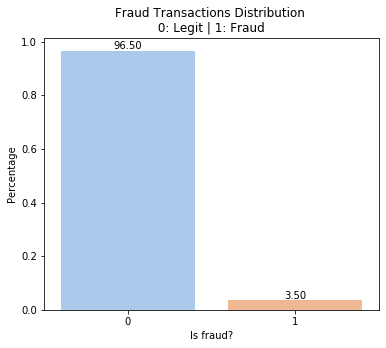

In [114]:
plt.figure(figsize=(6, 5))
yaxis = train['isFraud'].value_counts().values / train.shape[0]
barplot = sns.barplot(x=[0,1], y=yaxis, palette = 'pastel')
for p in barplot.patches:
    barplot.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title("Fraud Transactions Distribution \n 0: Legit | 1: Fraud ")
plt.xlabel('Is fraud?')
plt.ylabel('Percentage')

### TransactionDT - timedelta from a given reference datetime
- We can have a reasonable inference that TransactionDT is in seconds by doing some trails with simple math
- Therefore, we can create new columns such as hour, day, week, month to take a closer look to the time and target 
- As we can see from the distribution of TransactionDT(bin in minute), train and test datasets are in different time periods, thus splitting data by the time order can be a reasonable practice.
- It seems that in the hours from 4am to 12pm the fraction of fraudulent transaction is significantly higher than other hours. And from hour 2pm to 4pm, the fractions of fraud is the lowest. While from 7am to 10am the fraction is the highest. So we can create another new feature, classifying time periods into different levels of warning sign in terms of their fraud fraction.
- We can't model year or month as we only have one year of data so we won't be able to learn any trends. There is a chance for day of the week and hour being useful.

In [292]:
#reference: https://www.kaggle.com/c/ieee-fraud-detection/discussion/100071#latest-577632
train_span = (train['TransactionDT'].max() - train['TransactionDT'].min())/(3600*24)
test_span = (test['TransactionDT'].max() - test['TransactionDT'].min())/(3600*24)
total_span = (test['TransactionDT'].max() - train['TransactionDT'].min())/(3600*24)
gap_span = (test['TransactionDT'].min() - train['TransactionDT'].max())/(3600*24)
print('Time span of Train dataset is {:.2f} days'.format(train_span))
print('Time span of Test dataset is {:.2f} days'.format(test_span))
print('Time span of Total dataset is {:.2f} days'.format(total_span))
print('Time gap between train and test is {:.2f} days'.format(gap_span))

Time span of Train dataset is 182.00 days
Time span of Test dataset is 183.00 days
Time span of Total dataset is 395.00 days
Time gap between train and test is 30.00 days


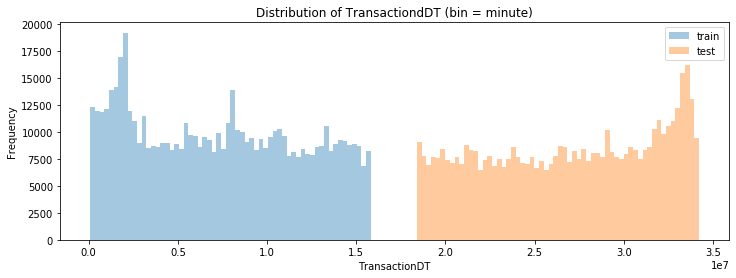

In [291]:
plt.figure(figsize=(12,4))
sns.distplot(train['TransactionDT'],kde=False,bins=60)
sns.distplot(test['TransactionDT'],kde=False,bins=60)
plt.legend(['train', 'test'])
plt.ylabel('Frequency')
plt.title('Distribution of TransactiondDT (bin = minute)');
plt.show()

As we can see from the distribution of TransactionDT(bin in minute) graph above, train and test datasets are in different time periods, thus splitting data by the time order can be a reasonable practice. And it seems that in the first month in train and last month in test, transaction frequency is higher than other months.

In [167]:
train['day'] = ((train['TransactionDT']//(3600*24)-1)%7)+1
test['day'] = ((test['TransactionDT']//(3600*24)-1)%7)+1

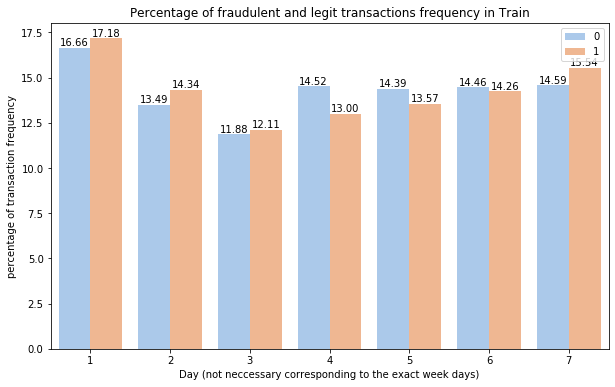

In [122]:
train_day = train.groupby('isFraud')['day'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('day')
plt.figure(figsize=(10,6))
barplot = sns.barplot(x="day", y="percentage", hue="isFraud", data=train_day, palette = 'pastel')
plt.legend()
plt.ylabel('percentage of transaction frequency')
plt.xlabel('Day (not neccessary corresponding to the exact week days)')
plt.title('Percentage of fraudulent and legit transactions frequency in Train')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Not much finding. On average, day 1 has higher transaction frequency, both in fraud and legit transactions.

In [168]:
train['hour'] = ((train['TransactionDT']//3600)%24)+1
test['hour'] = ((test['TransactionDT']//3600)%24)+1

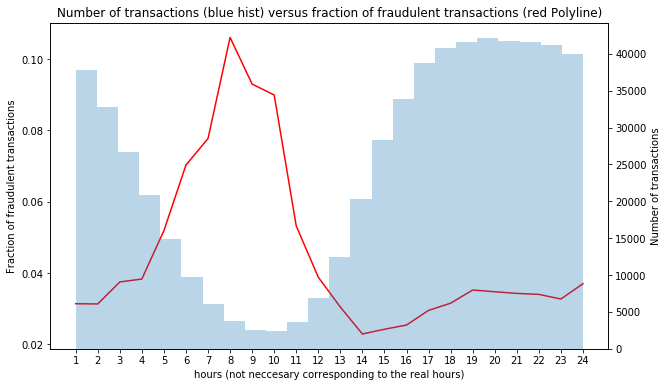

In [452]:
# https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature
plt.figure(figsize=(10,6))
plt.plot(train.groupby('hour').mean()['isFraud'], color='r')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['hour'], alpha=0.3, bins=24)
ax.set_xlabel('hours (not neccesary corresponding to the real hours)')
ax.set_ylabel('Fraction of fraudulent transactions')
ax2.set_ylabel('Number of transactions')
plt.title('Number of transactions (blue hist) versus fraction of fraudulent transactions (red Polyline)')
plt.xticks(np.arange(1, 25, 1))
plt.show()

From the graph above, it seems that from 4am to 12pm the fraction of fraud is significantly higher than other hours. From 2pm (14) to 4pm (16), the fractions of fraud is the lowest. While from 7am to 10am the fraction is the highest. So we can create a new feature in terms of this.

In [169]:
def new_hr_feature(hr):
    if hr >= 7 and hr < 10:
        return "highwarningsign"
    if hr >= 14 and hr < 16:
        return "lowestwarningsign"
    if (hr >= 4 and hr < 7) or (hr >= 10 and hr < 14):
        return "mediumwarningsign"
    else:
        return "lowwarningsign"
    
train['hour_warning'] = train['hour'].apply(new_hr_feature)
test['hour_warning'] = test['hour'].apply(new_hr_feature)

### TransactionAmt

In [44]:
# Reference: https://github.com/KaustuvDash/IEEE-Fraud-Detection
def describe(datatrain,datatest,feature):
    d = pd.DataFrame(columns=[feature,'Train','TrainFraud','TrainLegit','Test'])
    d[feature] = ['count','mean','std','min','25%','50%','75%','max','unique','NaN','NaNshare']
    for i in range(0,8):
        d['Train'].iloc[i] = datatrain[feature].describe().iloc[i]
        d['TrainFraud'].iloc[i]=datatrain[datatrain['isFraud']==1][feature].describe().iloc[i]
        d['TrainLegit'].iloc[i]=datatrain[datatrain['isFraud']==0][feature].describe().iloc[i]
        d['Test'].iloc[i]=datatest[feature].describe().iloc[i]
    d['Train'].iloc[8] = len(datatrain[feature].unique())
    d['TrainFraud'].iloc[8]=len(datatrain[datatrain['isFraud']==1][feature].unique())
    d['TrainLegit'].iloc[8]=len(datatrain[datatrain['isFraud']==0][feature].unique())
    d['Test'].iloc[8]=len(datatest[feature].unique())
    d['Train'].iloc[9] = datatrain[feature].isnull().sum()
    d['TrainFraud'].iloc[9] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()
    d['TrainLegit'].iloc[9] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()
    d['Test'].iloc[9]=datatest[feature].isnull().sum()
    d['Train'].iloc[10] = datatrain[feature].isnull().sum()/len(datatrain)
    d['TrainFraud'].iloc[10] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==1])
    d['TrainLegit'].iloc[10] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==0])
    d['Test'].iloc[10]=datatest[feature].isnull().sum()/len(datatest)
    return d

In [466]:
describe(train, test, 'TransactionAmt')

TransactionAmt    Train TrainFraud TrainLegit     Test
0           count   590540      20663     569877   506691
1            mean  135.027    149.245    134.512  134.726
2             std  239.163    232.212    239.395   245.78
3             min    0.251      0.292      0.251    0.018
4             25%   43.321     35.044      43.97       40
5             50%   68.769         75       68.5    67.95
6             75%      125        161        120      125
7             max  31937.4       5191    31937.4    10270
8          unique    20902       2515      20560    14119
9             NaN        0          0          0        0
10       NaNshare        0          0          0        0

The max value of train is three times than test. It might be caused by an outlier. Let's check if there are outliers in train.

In [9]:
train[train.TransactionAmt>10000]

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
274336        3261336        0        6652360       31937.391         W   
274339        3261339        0        6652391       31937.391         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
274336  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   
274339  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
274336    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   
274339    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12  C13  C14   D1  D2   D3   D4   D5  D6  D7  D8  \
274336  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   
274339  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   

        D9  D10  D11  D12  D13  D14  D15 M1 M2 M3   M4  ... V333 V334 V335  \
274336 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  ...  NaN  NaN  NaN   
274339 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  ...  NaN  NaN  NaN   

       V336 V337  V338  V339  id_01  id_02  id_03  id_04  id_05  id_06  id_07  \
274336  NaN  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
274339  NaN  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        id_08  id_09  id_10  id_11  id_12  id_13  id_14  id_15  id_16  id_17  \
274336    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
274339    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        id_18  id_19  id_20  id_21  id_22  id_23  id_24  id_25  id_26  id_27  \
274336    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
274339    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        id_28  id_29  id_30  id_31  id_32  id_33  id_34  id_35  id_36  id_37  \
274336    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
274339    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        id_38  DeviceType  DeviceInfo  day  hour    hour_warning  
274336    NaN         NaN         NaN    6    24  lowwarningsign  
274339    NaN         NaN         NaN    6    24  lowwarningsign  

[2 rows x 437 columns]

There are only two transactions with amount larger than $10,000 and they look like duplicated, thus we can remove them to avoid overfitting. For instance, when we are fitting the tree-based model, the leaf node might use them as samples which can't represent general pattern - overfitting. Notice that we can't remove the rows in test dataset as it will be used to predict Y to submit Kaggle.

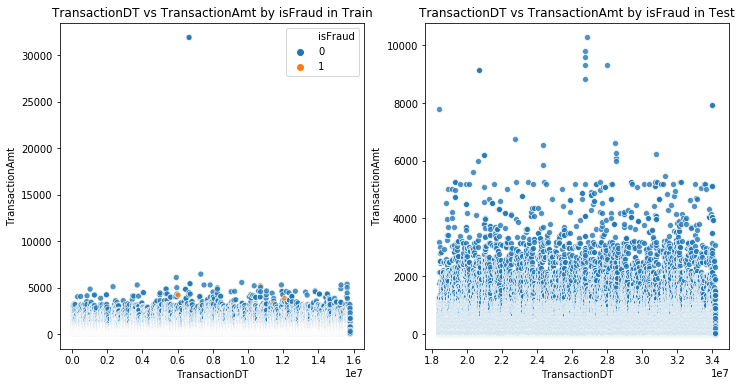

In [128]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g1 = sns.scatterplot(x="TransactionDT",y="TransactionAmt",hue="isFraud", data=train, alpha=0.8, hue_order=[0,1])
# plt.yticks(np.arange(0,7000,500))
# g1.axhline(6000, c='r')
plt.title('TransactionDT vs TransactionAmt by isFraud in Train')
plt.subplot(1,2,2)
sns.scatterplot(x="TransactionDT",y="TransactionAmt", data=test, alpha=0.8, hue_order=[0,1])
# plt.yticks(np.arange(0,10000,1000))
plt.title('TransactionDT vs TransactionAmt by isFraud in Test')
plt.show()

In [560]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
TransactionAmt_IQR = IQR[3]
TransactionAmt_Q1 = Q1[3]
TransactionAmt_Q3 = Q3[3]
print('There are %d observations are outliers lower than Q1 - 3*IQR' %len(train['TransactionAmt'][train['TransactionAmt'] < (TransactionAmt_Q1 - 3 * TransactionAmt_IQR)]))
print('There are %d observations are outliers higher than Q3 + 3*IQR' % len(train['TransactionAmt'][train['TransactionAmt'] > (TransactionAmt_Q3 + 3 * TransactionAmt_IQR)]))

There are 0 observations are outliers lower than Q1 - 3*IQR
There are 36420 observations are outliers higher than Q3 + 3*IQR


In [170]:
train.drop(train[train.TransactionAmt>10000].index, axis=0, inplace=True)

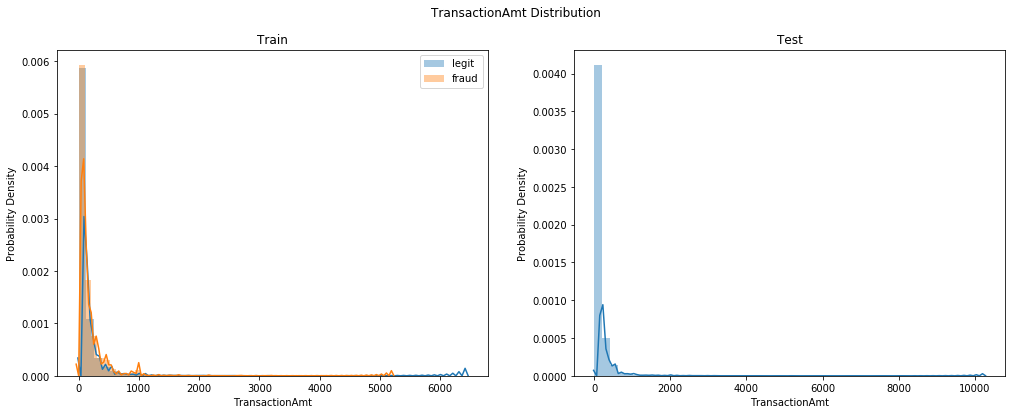

In [132]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['TransactionAmt'])
sns.distplot(train[train['isFraud']==1]['TransactionAmt'])
# plt.xticks(np.arange(0, 6500, 500))
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('TransactionAmt Distribution' , fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test['TransactionAmt'])
# plt.xticks(np.arange(0, 10000, 1000))
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

Due to the extreme high values in TransactionAmt, we should take a log to transform in order to better visualize it.

In [171]:
train['LogTransactionAmt'] = np.log(train['TransactionAmt'])
test['LogTransactionAmt'] = np.log(test['TransactionAmt'])

In [435]:
log_std = train.LogTransactionAmt.std()
log_mean = train.LogTransactionAmt.mean()
log_mean# - 2*log_std

4.365350926882108

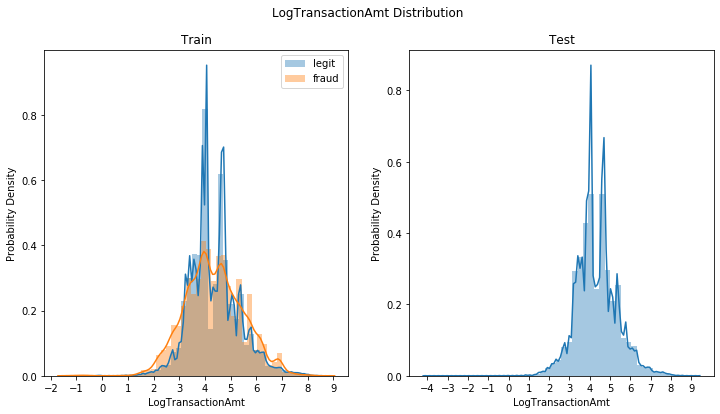

In [642]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['LogTransactionAmt'])
sns.distplot(train[train['isFraud']==1]['LogTransactionAmt'])
plt.xticks(np.arange(-2, 10, 1))
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('LogTransactionAmt Distribution' , fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test['LogTransactionAmt'])
plt.xticks(np.arange(-4, 10, 1))
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

The transactions with LogTransactionAmt larger than 5.5 (244 dollars) and smaller than 3.3 (27 dollars) have higher frequency and probability density being fraudulent. On the other hand, LogTransactionAmt from 3.3 to 5.5 have higher chance being legit.

### ProductCD

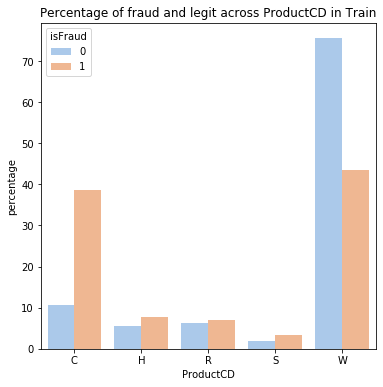

In [624]:
plt.figure(figsize=(6,6))
train_ProductCD = (train.groupby(['isFraud'])['ProductCD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('ProductCD'))
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD,palette = 'pastel')
plt.title('Percentage of fraud and legit across ProductCD in Train')
plt.show()

From the graph above we can see that if the transaction is fraudulent, there is 40% chance it's Product C (We can't say vice versa). Considering that only 10% of Legit transaction is C, I think there is higher chance that it's a fraud if it's product is C.

### card1

In [609]:
describe(train,test,'card1')

card1    Train TrainFraud TrainLegit     Test
0      count   590535      20663     569872   506690
1       mean  9898.75    9547.65    9911.48  9957.23
2        std  4901.16    4762.05    4905.66  4884.96
3        min     1000       1015       1000     1001
4        25%     6019     5732.5       6019     6019
5        50%     9678       9633       9711     9803
6        75%  14183.5      13623      14229    14276
7        max    18396      18375      18396    18397
8     unique    13553       1740      13350    13244
9        NaN        0          0          0        0
10  NaNshare        0          0          0        0

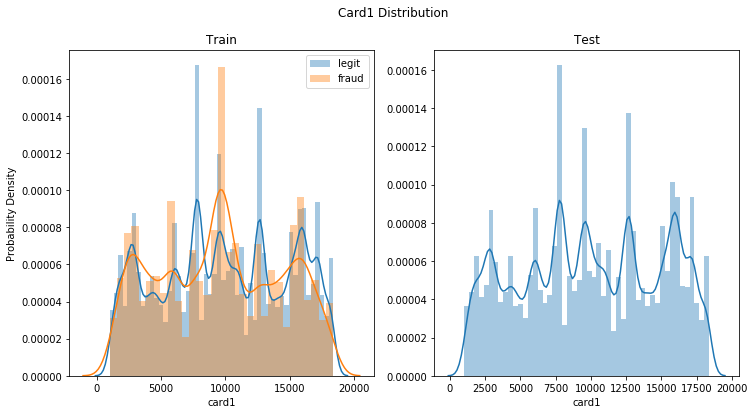

In [641]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['card1'])
sns.distplot(train[train['isFraud']==1]['card1'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.suptitle('Card1 Distribution' , fontsize=12)
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test['card1'])
plt.title('Test')
plt.show()

### card2

In [11]:
gc.collect()

40

In [608]:
describe(train,test,'card2')

card2     Train TrainFraud TrainLegit       Test
0      count    581602      20240     561362     498036
1       mean   362.555    365.371    362.454    363.736
2        std   157.793    159.624    157.726    158.688
3        min       100        100        100        100
4        25%       214        204        215        207
5        50%       361        375        361        369
6        75%       512        514        512        512
7        max       600        600        600        600
8     unique       501        328        501        498
9        NaN      8933        423       8510       8654
10  NaNshare  0.015127  0.0204714  0.0149332  0.0170795

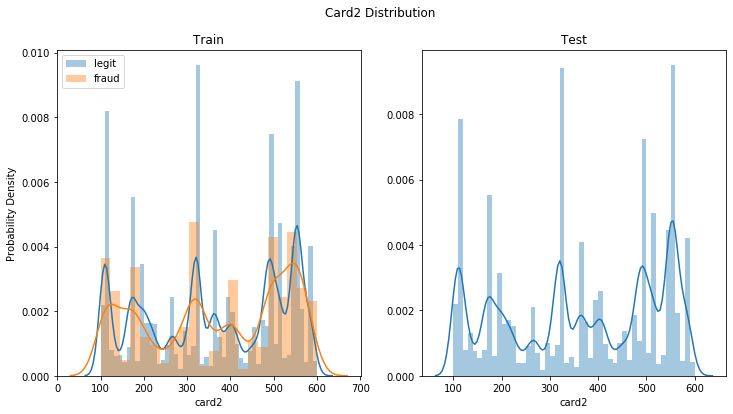

In [640]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['card2'].isnull())]['card2'])
sns.distplot(train[(train['isFraud']==1) & (~train['card2'].isnull())]['card2'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('Card2 Distribution' , fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test[~test['card2'].isnull()]['card2'])
plt.title('Test')
plt.show()

### card3

In [612]:
describe(train,test,'card3')

card3       Train  TrainFraud  TrainLegit        Test
0      count      588970       20624      568346      503688
1       mean     153.195     162.369     152.862     153.543
2        std     11.3365     17.4958     10.9045      12.443
3        min         100         100         100         100
4        25%         150         150         150         150
5        50%         150         150         150         150
6        75%         150         185         150         150
7        max         231         231         231         232
8     unique         115          63         107         116
9        NaN        1565          39        1526        3002
10  NaNshare  0.00265014  0.00188743  0.00267779  0.00592473

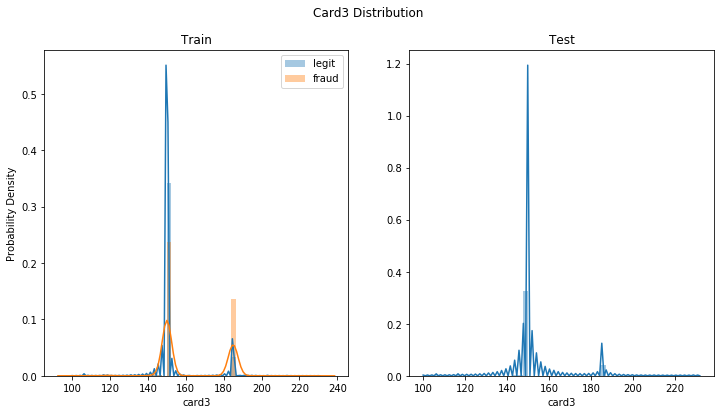

In [638]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['card3'].isnull())]['card3'])
sns.distplot(train[(train['isFraud']==1) & (~train['card3'].isnull())]['card3'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('Card3 Distribution', fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test[~test['card3'].isnull()]['card3'])
plt.title('Test')
plt.show()

Apparently card3 is a categorical variable. As the values around 150 have higher chances being legit we can create a new feature that categorize card3

In [172]:
def new_card3(row):
    if row==np.nan:
        return row
    else:
        if row > 160:
            return 'Positive'
        else:
            return 'Negative'
        
train['new_card3'] = train['card3'].apply(new_card3)
test['new_card3'] = train['card3'].apply(new_card3)

### card4

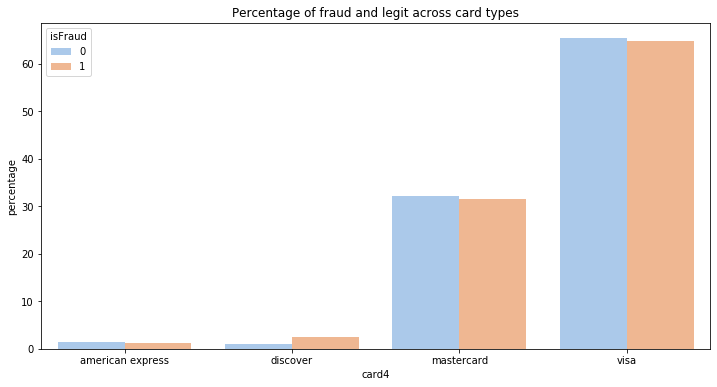

In [620]:
plt.figure(figsize=(12,6))
train_card4 = (train[~train['card4'].isnull()].groupby(['isFraud'])['card4'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4, palette = 'pastel')
plt.title('Percentage of fraud and legit across card types')
plt.show()

Most of the transactions completed by visa and mastercard card types.

### card5

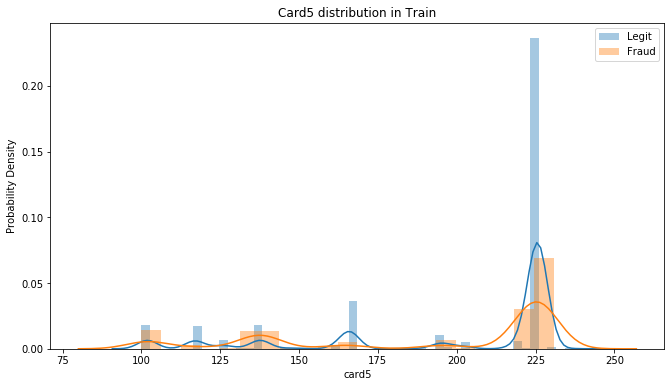

In [625]:
plt.figure(figsize=(11,6))
sns.distplot(train[(train['isFraud']==0) & (~train['card5'].isnull())]['card5'])
sns.distplot(train[(train['isFraud']==1) & (~train['card5'].isnull())]['card5'])
plt.legend(['Legit','Fraud'])
plt.ylabel('Probability Density')
plt.title('Card5 distribution in Train')
plt.show()

### card6

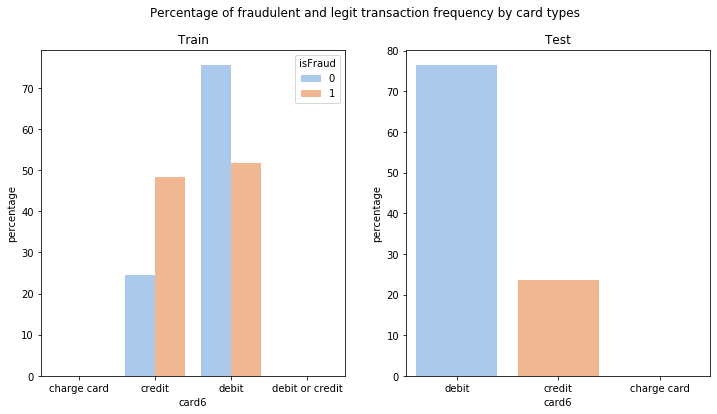

In [134]:
# Rerun this before replacement
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_card6 = (train[~train['card6'].isnull()].groupby(['isFraud'])['card6'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6, palette = 'pastel')
plt.title('Train')
plt.subplot(1,2,2)
test_card6 =test[~test['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index", y="percentage", data=test_card6, palette = 'pastel')
plt.xlabel('card6')
plt.title('Test')
plt.suptitle('Percentage of fraudulent and legit transaction frequency by card types', fontsize=12)
plt.show()

In [646]:
print('%d observations are charge card' % train[train['card6']=='charge card'].shape[0])
print('%d observations are debit or credit card' % train[train['card6']=='debit or credit'].shape[0])

15 observations are charge card
30 observations are debit or credit card


There are nearly no observations in 'charge card' and 'debit or credit' and there is no 'debit or credit' in Test dataset. As the sample size is not enough for finding general pattern, and the majority card6 type is debit, we can replace these observations to 'debit' type.

In [173]:
def replacetodebit(row):
    if row==np.nan:
        return row
    if row=='debit or credit' or row=='charge card':
        return 'debit'
    else:
        return row
    
train['card6'] = train['card6'].apply(replacetodebit)
test['card6'] = test['card6'].apply(replacetodebit)

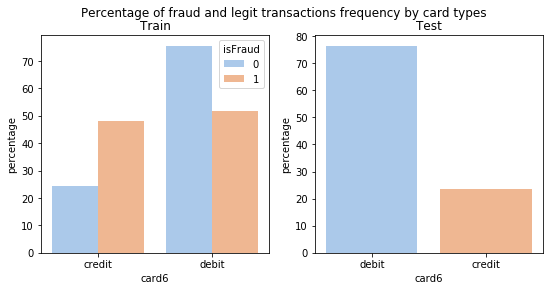

In [156]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
train_card6 = (train[~train['card6'].isnull()].groupby(['isFraud'])['card6'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6, palette = 'pastel')
plt.title('Train')
plt.subplot(1,2,2)
test_card6 =test[~test['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index", y="percentage", data=test_card6, palette = 'pastel')
plt.xlabel('card6')
plt.title('Test')
plt.suptitle('Percentage of fraud and legit transactions frequency by card types', fontsize=12)
plt.show()

### addr1 and addr2
From Hoster: addr1 - Purchaser Region, addr2 - Purchaser Billing Country

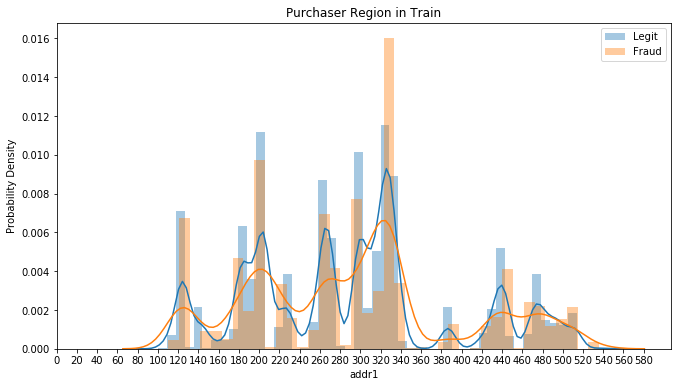

In [74]:
plt.figure(figsize=(11,6))
sns.distplot(train[(train['isFraud']==0) & (~train['addr1'].isnull())]['addr1'])
sns.distplot(train[(train['isFraud']==1) & (~train['addr1'].isnull())]['addr1'])
plt.legend(['Legit','Fraud'])
plt.xticks(np.arange(0, 600, 20))
plt.ylabel('Probability Density')
plt.title('Purchaser Region in Train')
plt.show()

330-340 seems have higher frequency of fraud

In [39]:
print('There are %d regions in addr1 of Train' % len(train['addr1'].value_counts()))
print(train['addr1'].value_counts().head(5))
print('There are %d regions in addr1 of Test' % len(test['addr1'].value_counts()))
print(test['addr1'].value_counts().head(5))

There are 332 regions in addr1 of Train
299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
Name: addr1, dtype: int64
There are 292 regions in addr1 of Test
299.0    38710
204.0    35049
325.0    34151
264.0    32710
330.0    22100
Name: addr1, dtype: int64


There are 332 and 292 regions in addr1 of Train and Test

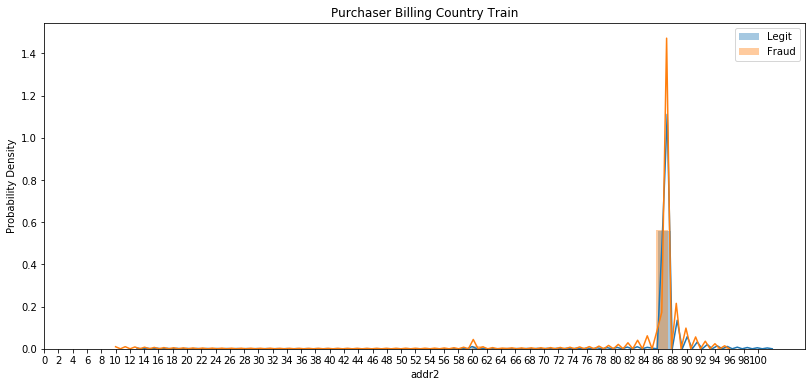

In [69]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['addr2'].isnull())]['addr2'])
sns.distplot(train[(train['isFraud']==1) & (~train['addr2'].isnull())]['addr2'])
plt.legend(['Legit','Fraud'])
plt.ylabel('Probability Density')
plt.xticks(np.arange(0, 102, 2))
plt.title('Purchaser Billing Country in Train')
plt.show()

Except 87, 60, 96, the sample size of each address is not enough 

In [145]:
print('There are %d billing countries in addr2 of Train. And the country 87 accounts for %.2f%%' % (len(train['addr2'].value_counts()), train['addr2'].value_counts().values[0] / len(train['addr2'])*100))
print(train['addr2'].value_counts().head(5))
print('There are %d billing countries in addr2 of Test. And the country 87 accounts for  %.2f%%' % (len(test['addr2'].value_counts()), test['addr2'].value_counts().values[0] / len(test['addr2'])*100))
print(test['addr2'].value_counts().head(5))

There are 74 billing countries in addr2 of Train. And the country 87 accounts for 88.14%
87.0    520479
60.0      3084
96.0       638
32.0        91
65.0        82
Name: addr2, dtype: int64
There are 72 billing countries in addr2 of Test. And the country 87 accounts for  86.04%
87.0    435934
60.0      4041
96.0       608
32.0        61
65.0        49
Name: addr2, dtype: int64


There are 74 billing countries in Train and 72 in test in total. The country 87 accounts for around 87% of transactions. The majority of purchaser billing country is from 87.0, which believed is the United States.

### dist1 and dist2

dist1

In [101]:
describe(train,test,'dist1')

dist1     Train TrainFraud TrainLegit      Test
0      count    238267       4755     233512    215474
1       mean   118.503    174.589    117.361   87.0653
2        std   371.873    424.232    370.643   314.132
3        min         0          0          0         0
4        25%         3          3          3         3
5        50%         8         10          8         8
6        75%        24       85.5         24        20
7        max     10286       4942      10286      8081
8     unique      2652        471       2636      1989
9        NaN    352271      15908     336363    291217
10  NaNshare  0.596526   0.769879    0.59024  0.574743

TrainFraud has higher average dist1 than TrainLegit. I guess Scammers usually commit fraud in a relative longer distance from cardholder's address.

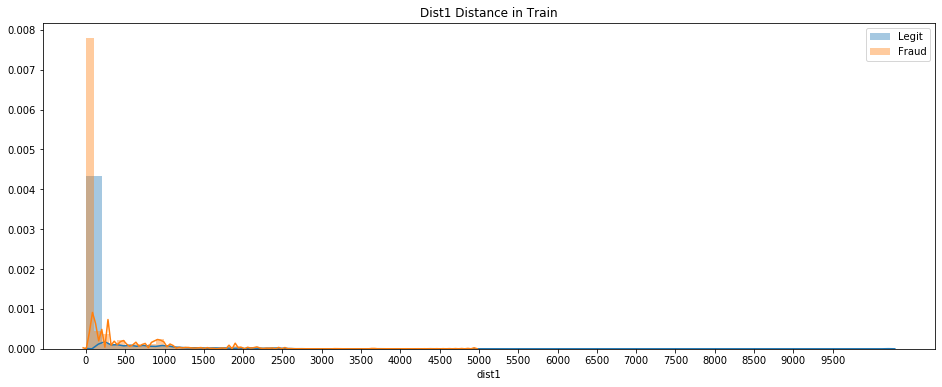

In [105]:
plt.figure(figsize=(16,6))
sns.distplot(train[(train['isFraud']==0) & (~train['dist1'].isnull())]['dist1'])
sns.distplot(train[(train['isFraud']==1) & (~train['dist1'].isnull())]['dist1'])
plt.legend(['Legit','Fraud'])
plt.xticks(np.arange(0, 10000, 500))
plt.title('Dist1 Distance in Train')
plt.show()

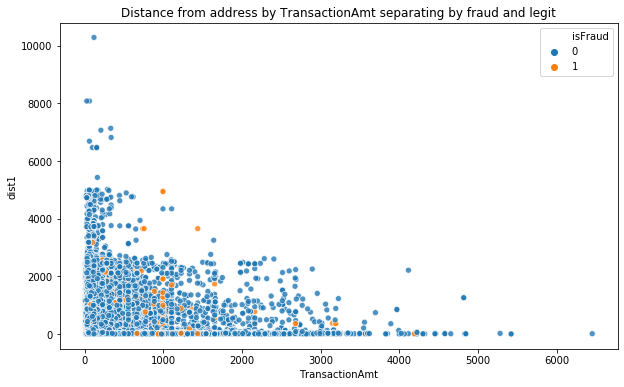

In [135]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="TransactionAmt",y="dist1",hue="isFraud",data=train[~train['dist1'].isnull()], alpha=0.8, hue_order=[0,1])
plt.title('Distance from address by TransactionAmt separating by fraud and legit')
plt.show()

It's clear that observations dist1 > 6000 are outliers in Train so let's remove them

In [175]:
train.drop(train[train.dist1>6000].index, axis=0, inplace=True)

dist2

In [130]:
describe(train,test,'dist2')

dist2     Train TrainFraud TrainLegit     Test
0      count     37627       3731      33896    36436
1       mean   231.855    201.472      235.2  237.175
2        std   529.053     451.59    536.798  556.451
3        min         0          0          0        0
4        25%         7          7          7        7
5        50%        37         49         36       44
6        75%       206        233        206      196
7        max     11623       9337      11623     9213
8     unique      1752        345       1724     1815
9        NaN    552911      16932     535979   470255
10  NaNshare  0.936284   0.819436    0.94052  0.92809

large percentages of missing values (93%)

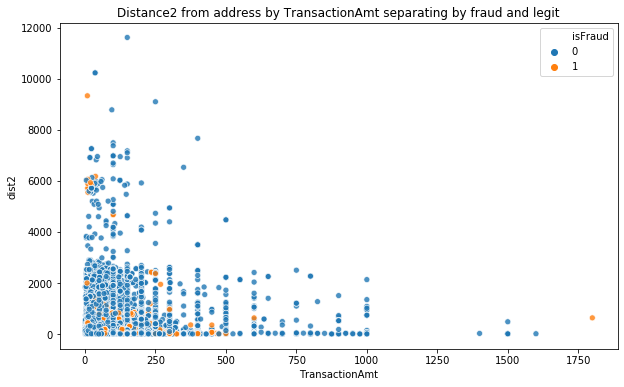

In [137]:
# need to be rerun before drop
plt.figure(figsize=(10,6))
sns.scatterplot(x="TransactionAmt",y="dist2",hue="isFraud",data=train[~train['dist2'].isnull()],alpha=0.8,hue_order=[0,1])
plt.title('Distance2 from address by TransactionAmt separating by fraud and legit')
plt.show()

It's clear that observations dist2 > 8000 are outliers in Train so let's remove them

In [176]:
train.drop(train[train.dist2>8000].index, axis=0, inplace=True)

### P_emaildomain and R_emaildomain
purchaser and recipient email domain

In [134]:
train['R_emaildomain'].value_counts().head(10)

gmail.com        57144
hotmail.com      27509
anonymous.com    20527
yahoo.com        11841
aol.com           3701
outlook.com       2507
comcast.net       1812
yahoo.com.mx      1508
icloud.com        1398
msn.com            852
Name: R_emaildomain, dtype: int64

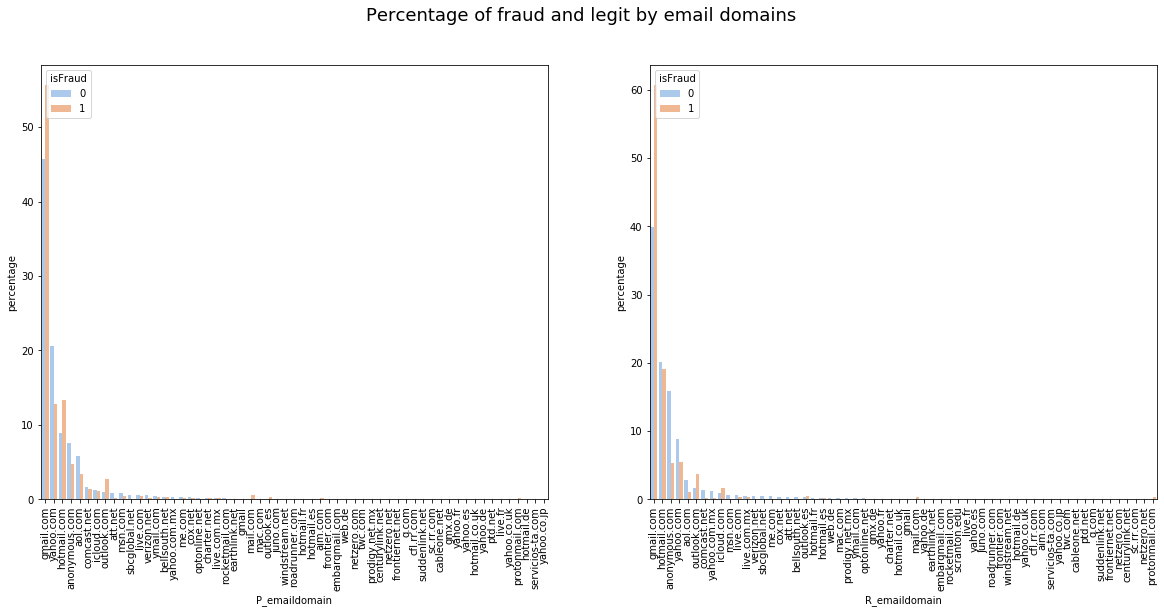

In [138]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
train_P_email = (train[~train['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x="P_emaildomain", y="percentage", hue="isFraud", data=train_P_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
train_R_email = train[~train['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data=train_R_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.suptitle('Percentage of fraud and legit by email domains', fontsize=18)
plt.show()

Let's combine group all e-mail domains by the respective enterprises and set all values with less than 500 entries as "Others". Also fill NaN by 'NoInf'.

In [177]:
# Reference: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook#Ploting-Transaction-Amount-Values-Distribution
train.loc[train['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'
train.loc[train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'
train.loc[train['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train.loc[train.P_emaildomain.isin(train.P_emaildomain.value_counts()[train.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"
train.P_emaildomain.fillna("NoInf", inplace=True)

train.loc[train['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train.loc[train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo'
train.loc[train['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train.loc[train.R_emaildomain.isin(train.R_emaildomain.value_counts()[train.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"
train.R_emaildomain.fillna("NoInf", inplace=True)

In [178]:
test.loc[test['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'
test.loc[test['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'
test.loc[test['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
test.loc[test.P_emaildomain.isin(test.P_emaildomain.value_counts()[test.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"
test.P_emaildomain.fillna("NoInf", inplace=True)

test.loc[test['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

test.loc[test['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo'
test.loc[test['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
test.loc[test.R_emaildomain.isin(test.R_emaildomain.value_counts()[test.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"
test.R_emaildomain.fillna("NoInf", inplace=True)

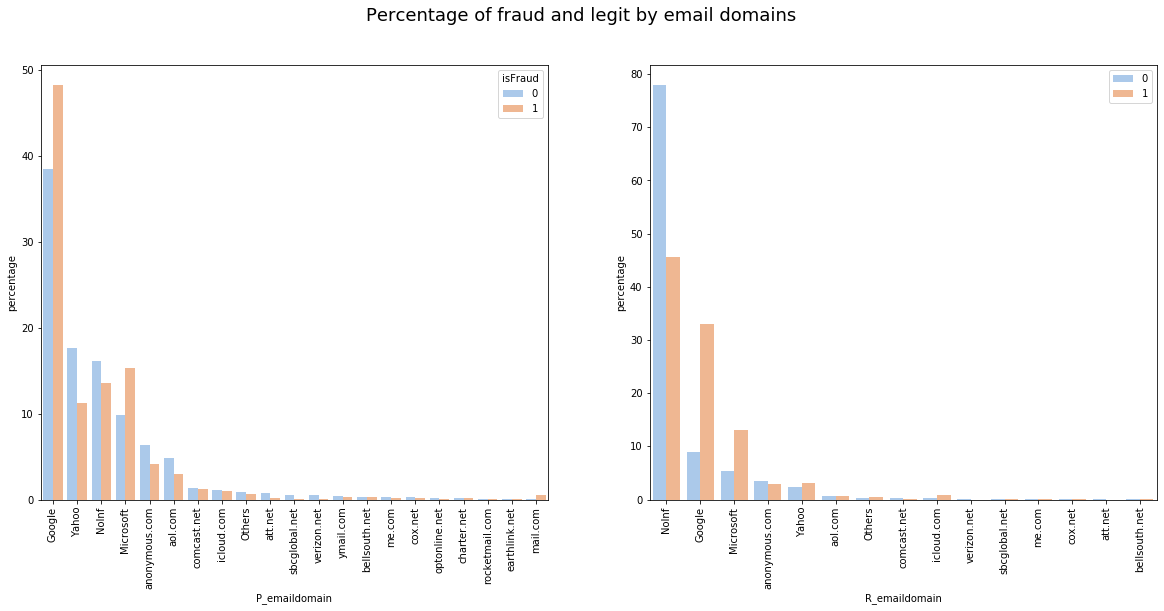

In [141]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
train_P_email = (train[~train['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x="P_emaildomain", y="percentage", hue="isFraud", data=train_P_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
train_R_email = train[~train['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data=train_R_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.suptitle('Percentage of fraud and legit by email domains', fontsize=18)
plt.show()

In [20]:
gc.collect()

20

### C1-C14
Continuous variables.

Meaning: Counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked. 

Let's take a look of their distribution, description, and scatterplot for outliers.

C1-C14 don't have any missing value in Train but only 3 in Test, which is good. 

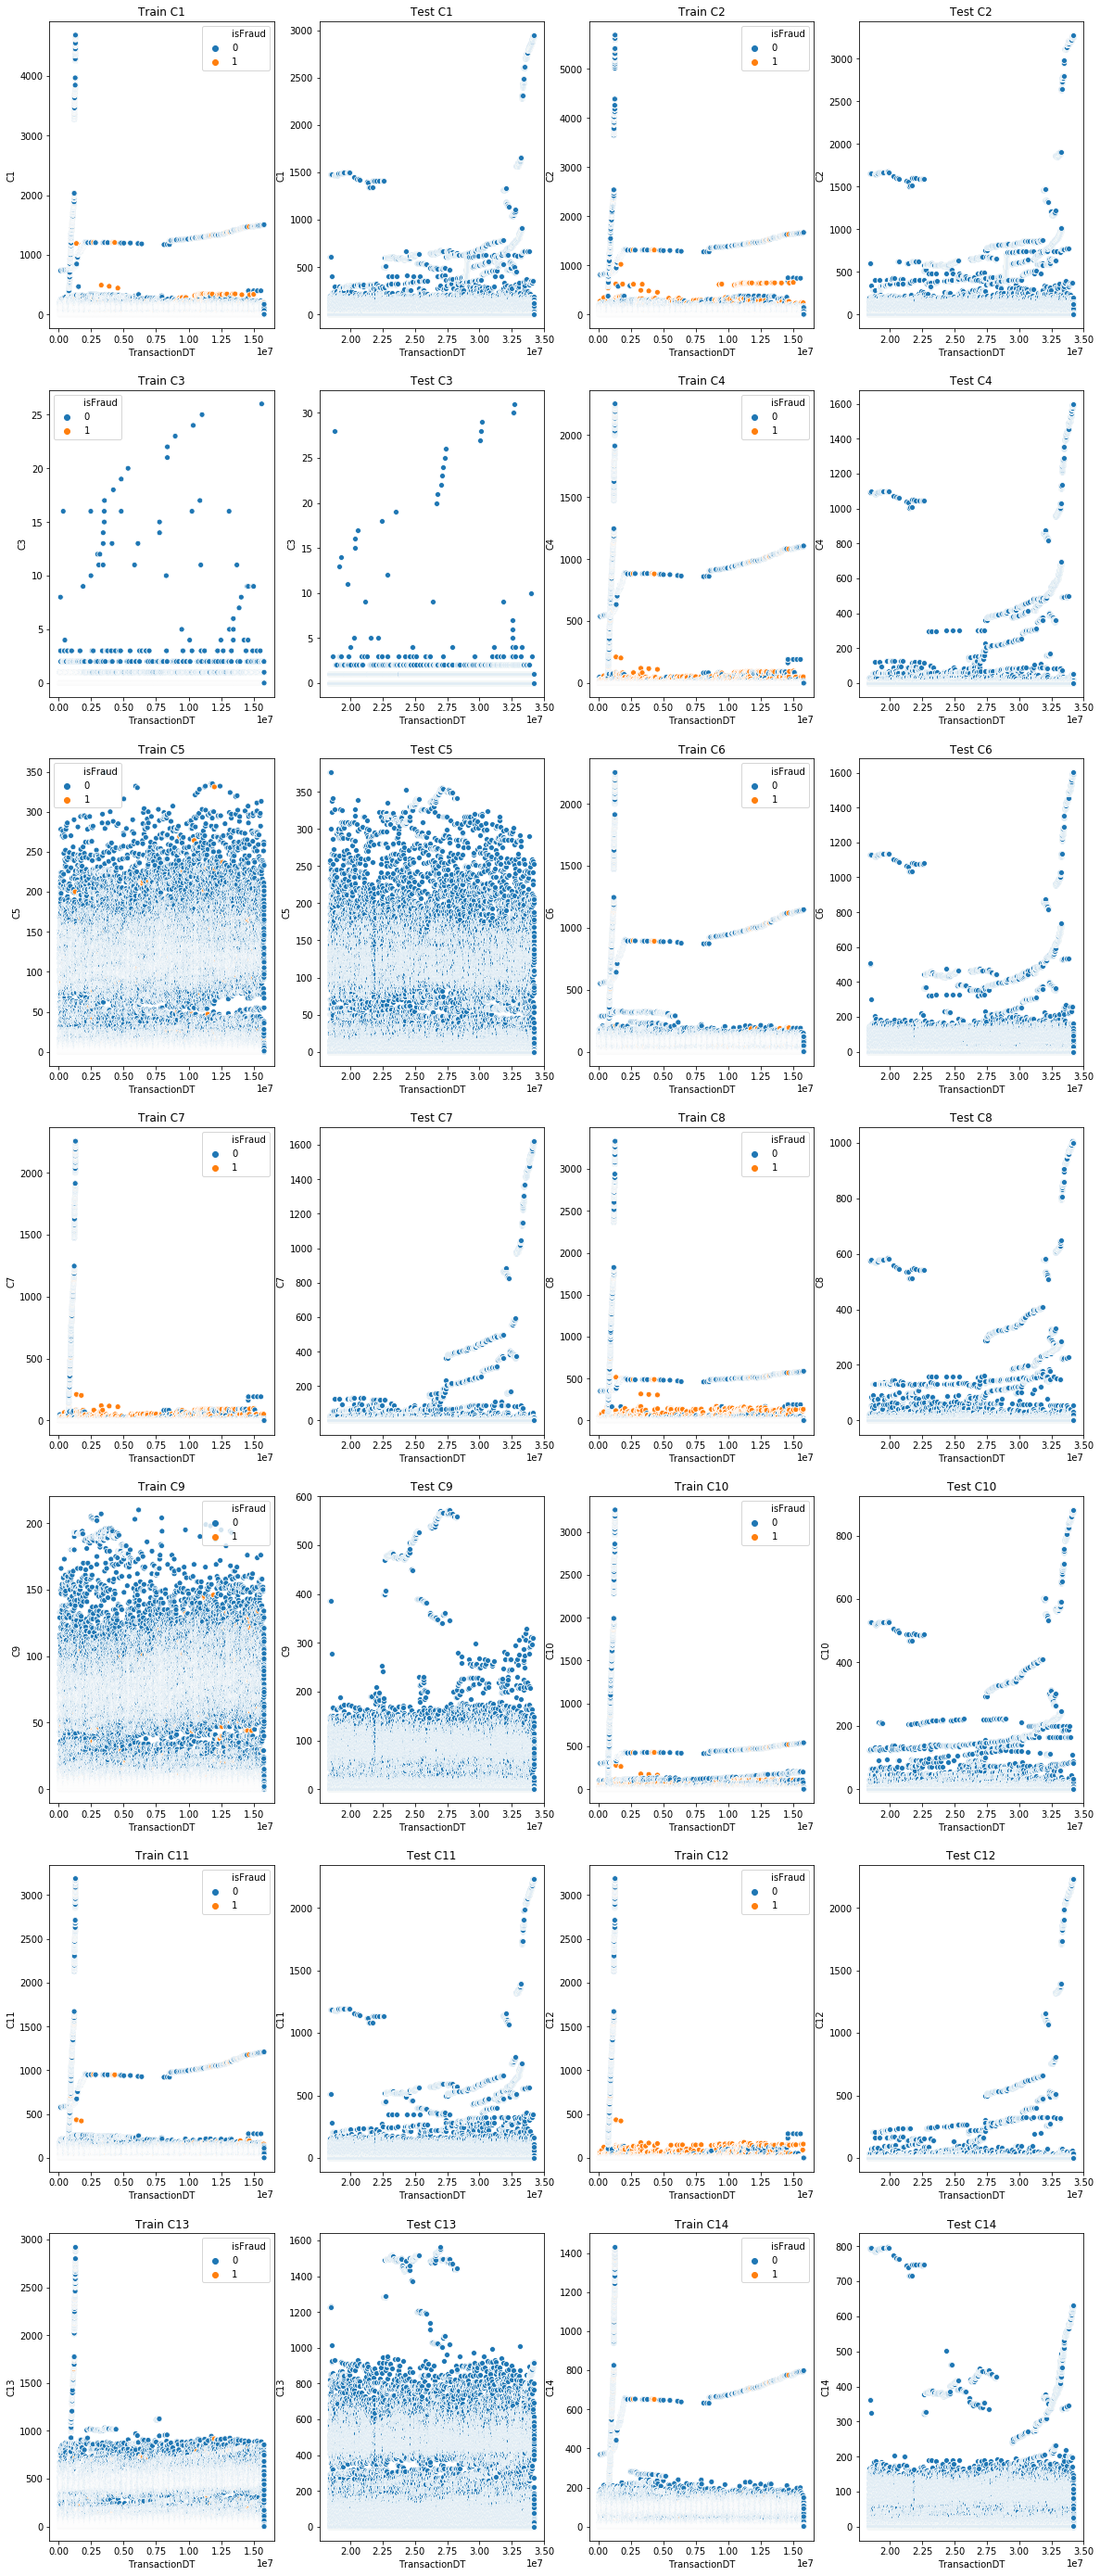

In [158]:
# Rerun before dropping outliers
plt.figure(figsize=(20,50))
var = ['C' + str(i) for i in range(1,15)]
i = 1
for col in var:
    plt.subplot(7,4,i)
    sns.scatterplot(x="TransactionDT",y=col,hue="isFraud",data=train[~train[col].isnull()])
    plt.title('Train '+ col)
    i += 1
    plt.subplot(7,4,i)
    sns.scatterplot(x="TransactionDT",y=col,data=test[~test[col].isnull()])
    plt.title('Test '+ col)
    i += 1
plt.show()

In [160]:
# train[train['C1'] > 2000] # 1196912 - 1199904DT day6
# train[train['C2'] > 2000] # 1028102 - 1199904DT day4-6
# train[train['C4'] > 1200] # ....... - 1199904DT day4-6

- C5 and C9 don't have outliers
- Other C features have extreme outliers where TransactionDT in range of around 1028000 - 1199904DT, day 4-6. A large amount of addresses are found to be associated with the payment card in this time range.

We see similar outliers in the end of TransactionDT Test

Let's remove some outliers

In [179]:
train.drop(train[train.C1>3000].index, axis=0, inplace=True)
train.drop(train[train.C2>3000].index, axis=0, inplace=True)
train.drop(train[train.C7>1400].index, axis=0, inplace=True)
train.drop(train[train.C4>1400].index, axis=0, inplace=True)
train.drop(train[train.C6>1400].index, axis=0, inplace=True)
train.drop(train[train.C7>1400].index, axis=0, inplace=True)
train.drop(train[train.C8>1000].index, axis=0, inplace=True)
train.drop(train[train.C10>1000].index, axis=0, inplace=True)
train.drop(train[train.C11>2000].index, axis=0, inplace=True)
train.drop(train[train.C12>2000].index, axis=0, inplace=True)
train.drop(train[train.C13>1200].index, axis=0, inplace=True)
train.drop(train[train.C14>800].index, axis=0, inplace=True)

In [50]:
var = ['C' + str(i) + '_desc' for i in range(1,15)]
col = ['C' + str(i) for i in range(1,15)]
frame = []
def des(var,col):
    for i, j in zip(var,col):
        i = describe(train,test,j)
        frame.append(i)

    return pd.concat(frame, axis=1)

des(var,col)

C1    Train TrainFraud TrainLegit         Test        C2    Train  \
0      count   590015      20606     569409       506688     count   590015   
1       mean  10.7864    24.7738    10.2802      10.0932      mean  11.5276   
2        std  70.1935    126.259    67.2401      79.3348       std  85.0866   
3        min        0          0          0            0       min        0   
4        25%        1          1          1            1       25%        1   
5        50%        1          2          1            1       50%        1   
6        75%        3          6          3            3       75%        3   
7        max     2032       2024       2032         2950       max     2538   
8     unique     1256        445       1164         1175    unique     1086   
9        NaN        0          0          0            3       NaN        0   
10  NaNshare        0          0          0  5.92077e-06  NaNshare        0   

   TrainFraud TrainLegit         Test        C3       Train   TrainFraud  \
0       20606     569409       506688     count      590015        20606   
1     33.2879    10.7401      10.7146      mean  0.00564901  0.000242648   
2     163.661    80.7138      88.8969       std    0.150602    0.0155756   
3           0          0            0       min           0            0   
4           1          1            1       25%           0            0   
5           2          1            1       50%           0            0   
6           7          3            3       75%           0            0   
7        2535       2538         3275       max          26            1   
8         510        949         1124    unique          27            2   
9           0          0            3       NaN           0            0   
10          0          0  5.92077e-06  NaNshare           0            0   

    TrainLegit         Test        C4    Train TrainFraud TrainLegit  \
0       569409       506688     count   590015      20606     569409   
1   0.00584466    0.0274035      mean  2.51729    9.92274     2.2493   
2     0.153271     0.227753       std  42.4664    76.8314    40.6569   
3            0            0       min        0          0          0   
4            0            0       25%        0          0          0   
5            0            0       50%        0          1          0   
6            0            0       75%        0          2          0   
7           26           31       max     1246       1234       1246   
8           27           32    unique      875        177        826   
9            0            3       NaN        0          0          0   
10           0  5.92077e-06  NaNshare        0          0          0   

           Test        C5    Train TrainFraud TrainLegit         Test  \
0        506688     count   590015      20606     569409       506688   
1       2.38587      mean  5.57648    1.41061    5.72723       4.9627   
2        41.943       std  25.7979    12.9638    26.1321      25.4622   
3             0       min        0          0          0            0   
4             0       25%        0          0          0            0   
5             0       50%        0          0          0            0   
6             1       75%        1          0          1            1   
7          1601       max      349        331        349          376   
8           729    unique      319        124        319          354   
9             3       NaN        0          0          0            3   
10  5.92077e-06  NaNshare        0          0          0  5.92077e-06   

          C6    Train TrainFraud TrainLegit         Test        C7    Train  \
0      count   590015      20606     569409       506688     count   590015   
1       mean  7.50057    11.7737    7.34593      6.85499      mean  1.27156   
2        std  46.8268    77.9748    45.2924      46.7836       std  29.4172   
3        min        0          0          0            0       min        0   
4        25

C features don't have any missing values in Train, and there are 3 NaN consistently in Test except C13

The means and stds of TrainFraud of C features are significantly different than TrainLegit, mostly larger in TrainFraud, as what we can see from scatterplot above like C7,C8,C12.

In [21]:
gc.collect()

60

### D1-D15
timedelta, such as days between previous transaction, etc.

The hour of the day is D9: train['D9'] = (train['TransactionDT']%(3600*24)/3600//1)/24.0, reference:https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400#latest-579480;

In [186]:
train.iloc[:, 31:46].head()

D1     D2    D3    D4   D5  D6  D7  D8  D9   D10    D11  D12  D13  D14  \
0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN  13.0   13.0  NaN  NaN  NaN   
1    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0    NaN  NaN  NaN  NaN   
2    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0  315.0  NaN  NaN  NaN   
3  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN  84.0    NaN  NaN  NaN  NaN   
4    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   NaN    NaN  NaN  NaN  NaN   

     D15  
0    0.0  
1    0.0  
2  315.0  
3  111.0  
4    NaN

In [174]:
var = ['D' + str(i) + '_desc' for i in range(1,16)]
col = ['D' + str(i) for i in range(1,16)]
frame = []
def des(var,col):
    for i, j in zip(var,col):
        i = describe(train,test,j)
        frame.append(i)

    return pd.concat(frame, axis=1)

des(var,col)

D1       Train  TrainFraud  TrainLegit       Test        D2  \
0      count      588258       20502      567756     500660     count   
1       mean     94.4459     38.7202     96.4581    108.208      mean   
2        std     157.723     100.838     159.033    176.965       std   
3        min           0           0           0          0       min   
4        25%           0           0           0          0       25%   
5        50%           3           0           4          5       50%   
6        75%         122          14         127        148       75%   
7        max         640         637         640        641       max   
8     unique         642         578         642        643    unique   
9        NaN        1269          46        1223       6031       NaN   
10  NaNshare  0.00215257  0.00223866  0.00214946  0.0119027  NaNshare   

       Train TrainFraud TrainLegit      Test        D3     Train TrainFraud  \
0     309448       7854     301594    271922     count    327259       9570   
1    169.639    77.8872    172.029   188.667      mean   28.3367    11.7322   
2    177.338    128.797    177.794     197.1       std   62.3529    42.0043   
3          0          0          0         0       min         0          0   
4         26          2         27        26       25%         1          0   
5         97         16        100       112       50%         8          1   
6        276         95        281       305       75%        27          5   
7        640        637        640       641       max       819        582   
8        642        542        642       643    unique       650        261   
9     280079      12694     267385    234769       NaN    262268      10978   
10  0.475091   0.617773   0.469938  0.463338  NaNshare  0.444879   0.534261   

   TrainLegit      Test        D4     Train TrainFraud TrainLegit      Test  \
0      317689    303549     count    420618      14456     406162    429840   
1     28.8369   33.3947      mean     140.2    72.0409    142.626   175.061   
2     62.7958   82.5582       std   191.194    140.743    192.302   250.417   
3           0         0       min      -122          0       -122         0   
4           1         1       25%         0          0          0         0   
5           8         7       50%        26          1         28        21   
6          28        28       75%       254         60        261       290   
7         819      1076       max       869        667        869      1091   
8         650       888    unique       809        606        809      1057   
9      251290    203142       NaN    168909       6092     162817     76851   
10   0.441651  0.400919  NaNshare  0.286516   0.296477   0.286156  0.151672   

          D5     Train TrainFraud TrainLegit      Test        D6     Train  \
0      count    280198      10797     269401    282316     count     72200   
1       mean   42.3455     13.687    43.4941   50.9778      mean   69.9892   
2        std   89.0023    51.9301     89.981    116.83       std       144   
3        min         0          0          0         0       min       -83   
4        25%         1          0          1         0       25%         0   
5        50%        10          0         10         8       50%         0   
6        75%        32          3         34        34       75%        40   
7        max       819        625        819      1088       max       873   
8     unique       689        340        689       962    unique       830   
9        NaN    309329       9751     299578    224375       NaN    517327   
10  NaNshare  0.524707   0.474547   0.526519  0.442824  NaNshare  0.877529   

   TrainFraud TrainLegit     Test        D7     Train TrainFraud TrainLegit  \
0        7607      64593   124783     count     38424       5707      32717   
1     45.4195    72.8827  82.4431      mean   41.7015    11.2558    47.0123   
2     101.144    147.966  192.868       std   99.8897    46.7

D2,D3,D5,D6,D7,D8,D9,D11,D12,D13,D14 have at least higher than 40% NaNshare

D6-D9, D12-D13 have around 90% of missing value

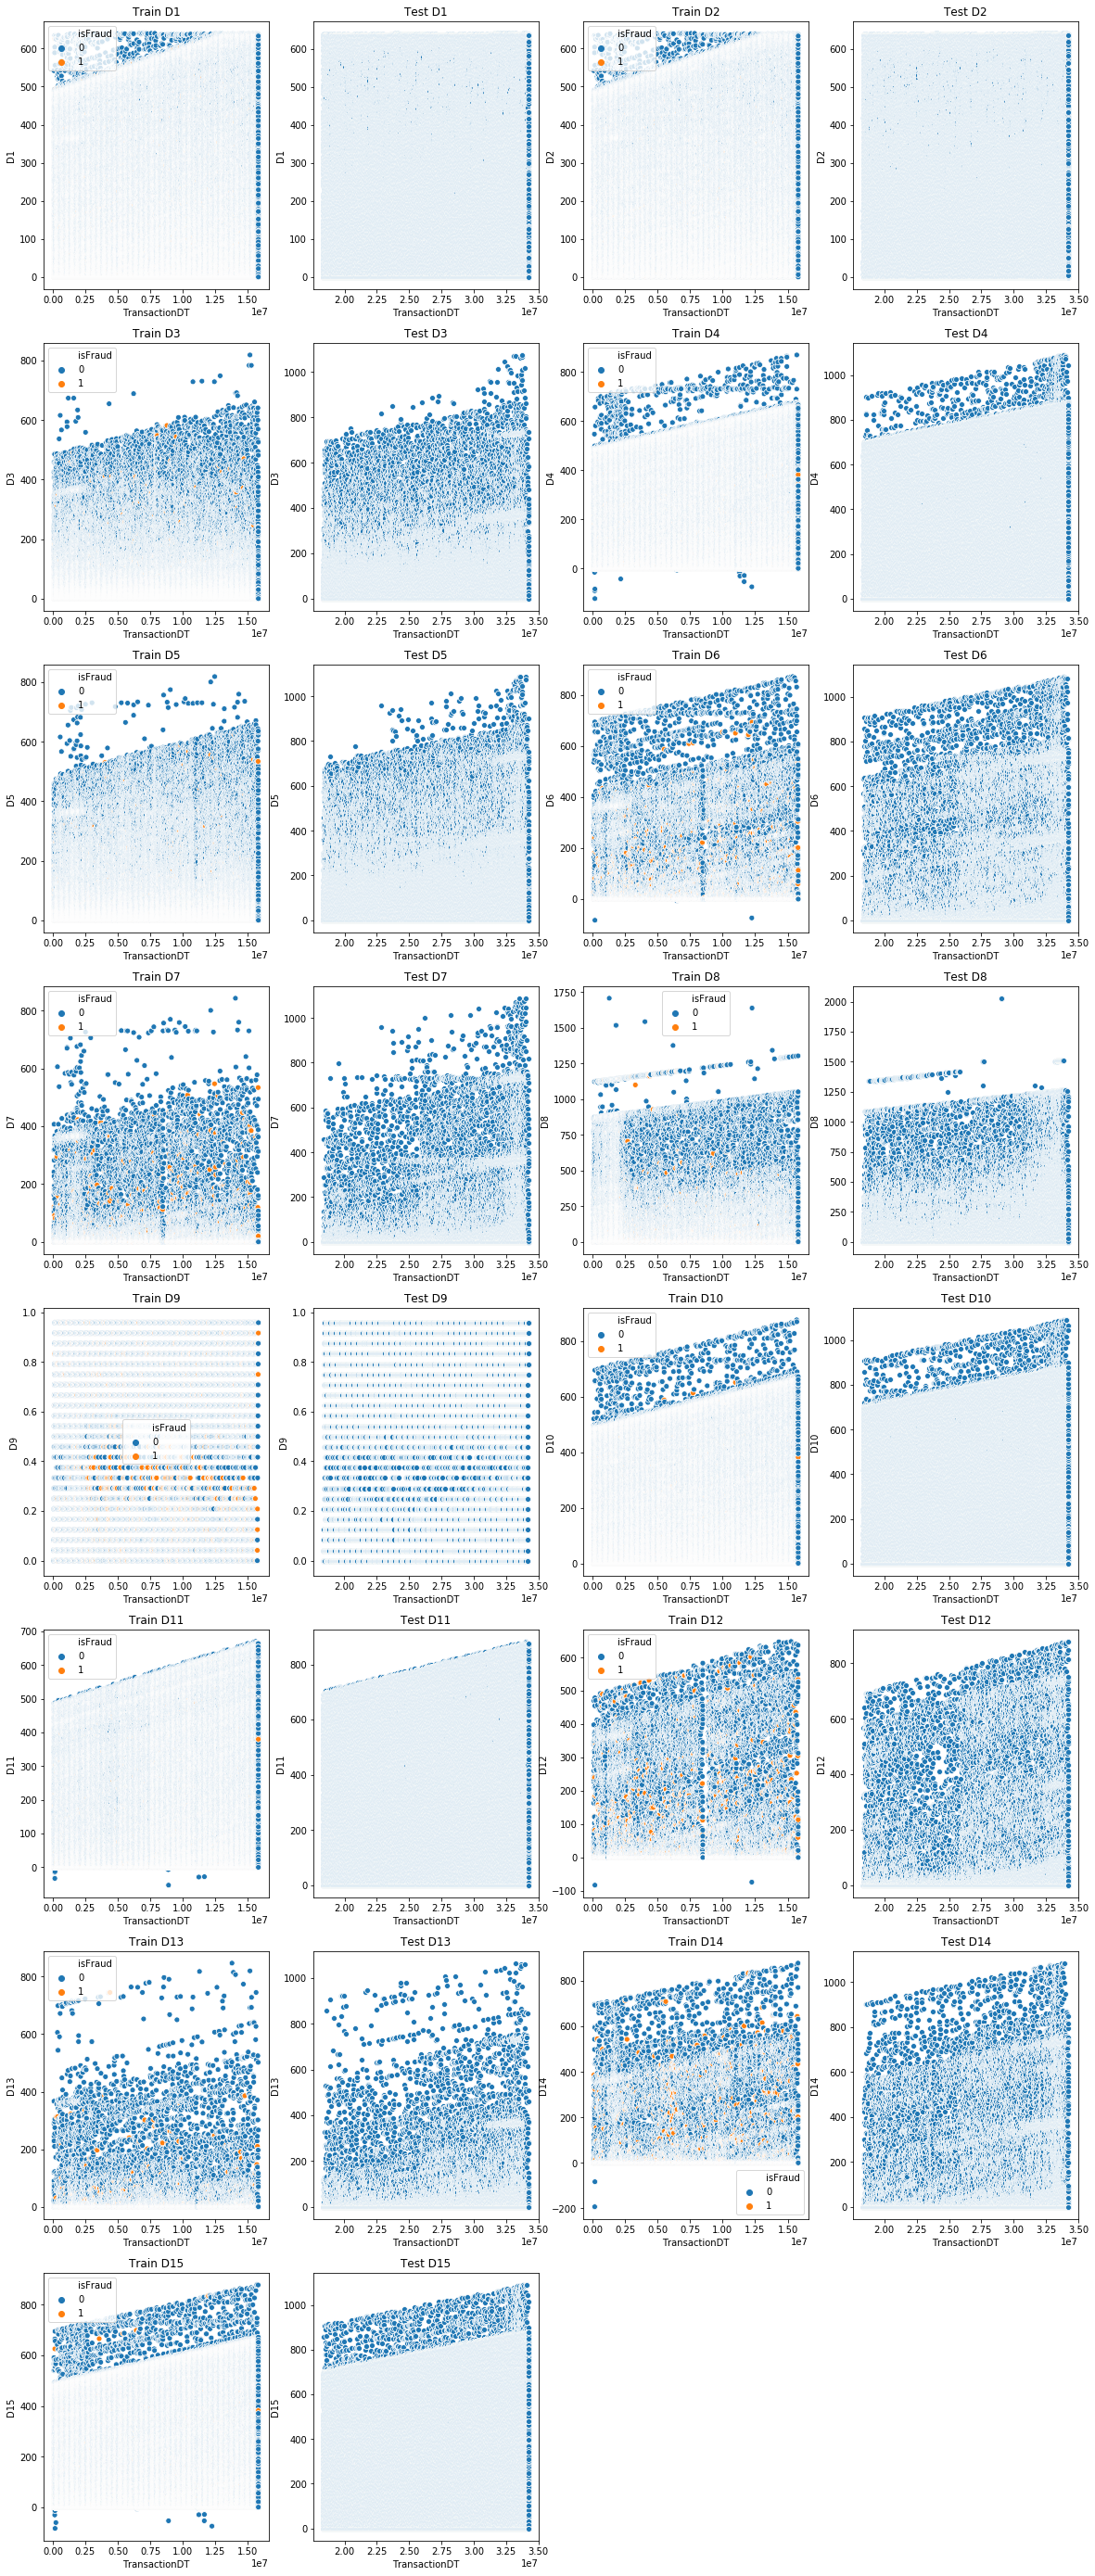

In [183]:
plt.figure(figsize=(20,50))
var = ['D' + str(i) for i in range(1,16)]
i = 1
for col in var:
    plt.subplot(8,4,i)
    sns.scatterplot(x="TransactionDT",y=col,hue="isFraud",data=train[~train[col].isnull()])
    plt.title('Train '+col)
    i += 1
    plt.subplot(8,4,i)
    sns.scatterplot(x="TransactionDT",y=col,data=test[~test[col].isnull()])
    plt.title('Test '+col)
    i += 1
plt.show()


Most of D features are Monotonically increasing with TransactionDT which make sense because they are featured by Vesta claimed as timedelta, such as days between previous transaction, etc.

In [180]:
gc.collect()

20

### M1 - M9

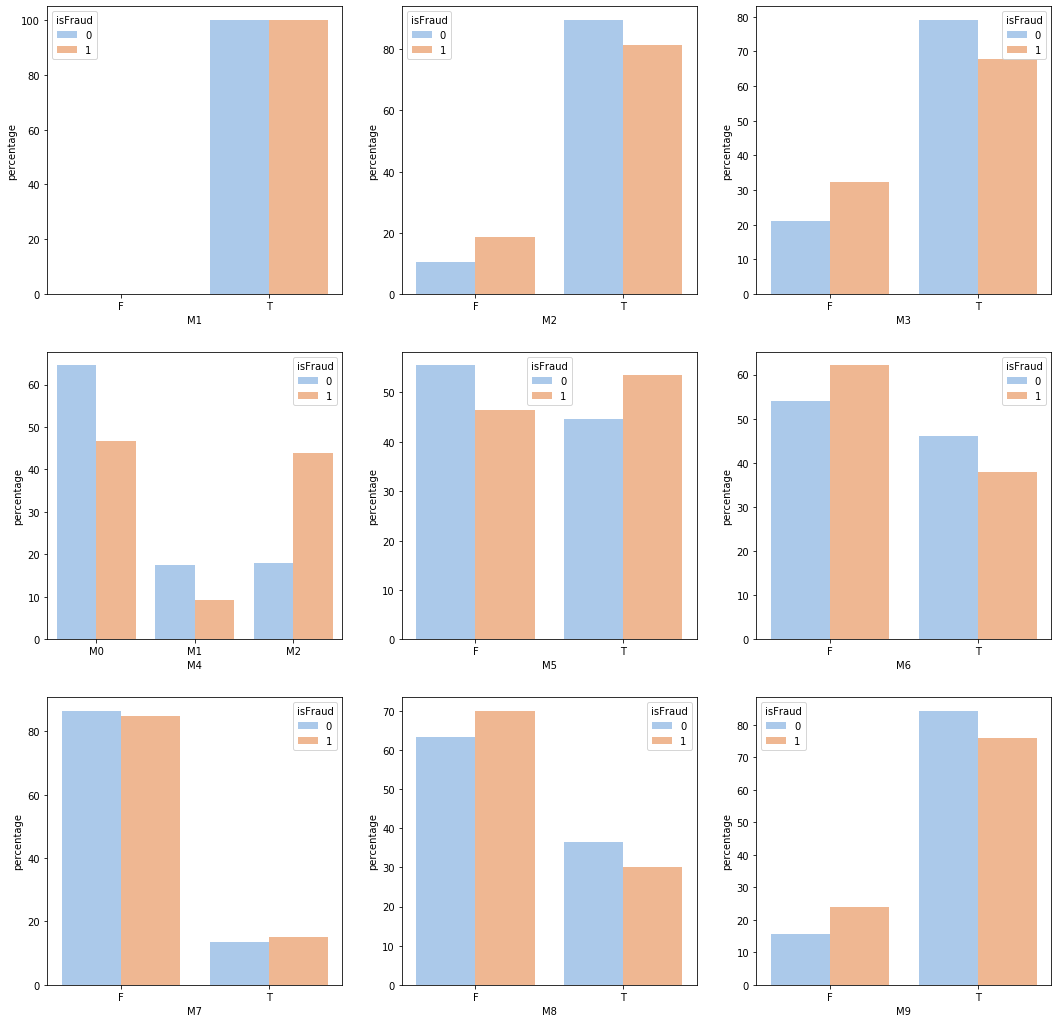

In [98]:
plt.figure(figsize=(18,18))
var = ['train_m' + str(i) for i in range(1,10)]
col = ['M' + str(i) for i in range(1,10)]
for i,j,k in zip(var,col,range(1,10)):
    i = (train.groupby(['isFraud'])[j]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(j))
    plt.subplot(3,3,k)
    sns.barplot(x=j, y="percentage", hue="isFraud", data=i, palette = 'pastel')
plt.show()

### V features

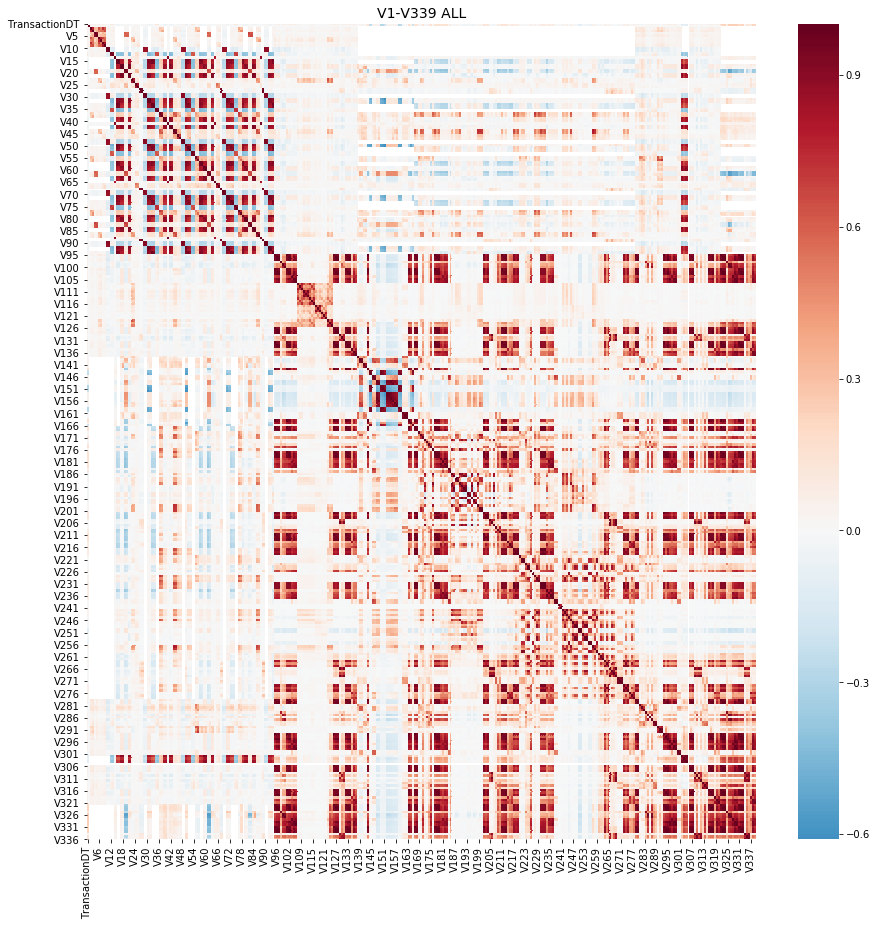

In [182]:
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
cols.remove('V107')
train2 = train[cols].sample(frac=0.2)
plt.figure(figsize=(15,15))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

In [194]:
del train2

In [195]:
gc.collect()

72

### id01 - id38

In [203]:
# 1328 rows without any missing values in id01-id38
print(train[~train.iloc[:, 393:431].isnull().any(axis=1)].iloc[:, 393:431].shape)
train[~train.iloc[:, 393:431].isnull().any(axis=1)].iloc[:, 393:431].head()

(1328, 38)


id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  \
99    -10.0  129080.0    0.0    0.0    9.0  -43.0   22.0  -34.0    0.0    0.0   
188    -5.0   15464.0    0.0    0.0    4.0  -44.0    6.0  -55.0    0.0    0.0   
1702  -20.0  171610.0    0.0    0.0   13.0  -34.0    2.0  -33.0    0.0    0.0   
1706  -20.0   50100.0    0.0    0.0   12.0  -34.0    2.0  -33.0    0.0    0.0   
1714  -55.0   83328.0    0.0    0.0    9.0 -100.0   17.0  -13.0    0.0    0.0   

      id_11     id_12  id_13  id_14  id_15  id_16  id_17  id_18  id_19  id_20  \
99    100.0     Found   49.0 -300.0  Found  Found  166.0   12.0  122.0  549.0   
188   100.0     Found   55.0 -300.0  Found  Found  166.0   13.0  122.0  256.0   
1702  100.0  NotFound   15.0 -300.0  Found  Found  166.0   12.0  317.0  549.0   
1706  100.0     Found   15.0 -300.0  Found  Found  166.0   12.0  317.0  549.0   
1714  100.0  NotFound   11.0 -300.0  Found  Found  166.0   13.0  365.0  489.0   

      id_21  id_22                 id_23  id_24  id_25  id_26  id_27  id_28  \
99    252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  184.0  Found  Found   
188   252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  102.0  Found  Found   
1702  252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  184.0  Found  Found   
1706  252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  184.0  Found  Found   
1714  228.0   14.0  IP_PROXY:TRANSPARENT   11.0  426.0  117.0  Found  Found   

      id_29       id_30                  id_31  id_32      id_33  \
99    Found  iOS 11.0.3  mobile safari generic   32.0   1334x750   
188   Found     Android            chrome 62.0   32.0  2560x1440   
1702  Found  iOS 11.1.2     mobile safari 11.0   32.0  2208x1242   
1706  Found  iOS 11.1.2     mobile safari 11.0   32.0  2208x1242   
1714  Found   Windows 7    ie 11.0 for desktop   24.0   1440x900   

               id_34 id_35 id_36 id_37 id_38  
99    match_status:2     T     F     T     F  
188   match_status:2     T     F     T     T  
1702  match_status:1     T     F     T     T  
1706  match_status:1     T     F     T     T  
1714  match_status:2     T     T     T     T

obj cols: 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'

In [223]:
# for i in range(1,39):
#     if i < 10:
#         print('Number of categories in the col %s : %d' %(i,len(train['id_0'+str(i)].value_counts().index)))
#     else:
#         print('Number of categories in the col %s : %d' %(i,len(train['id_'+str(i)].value_counts().index)))

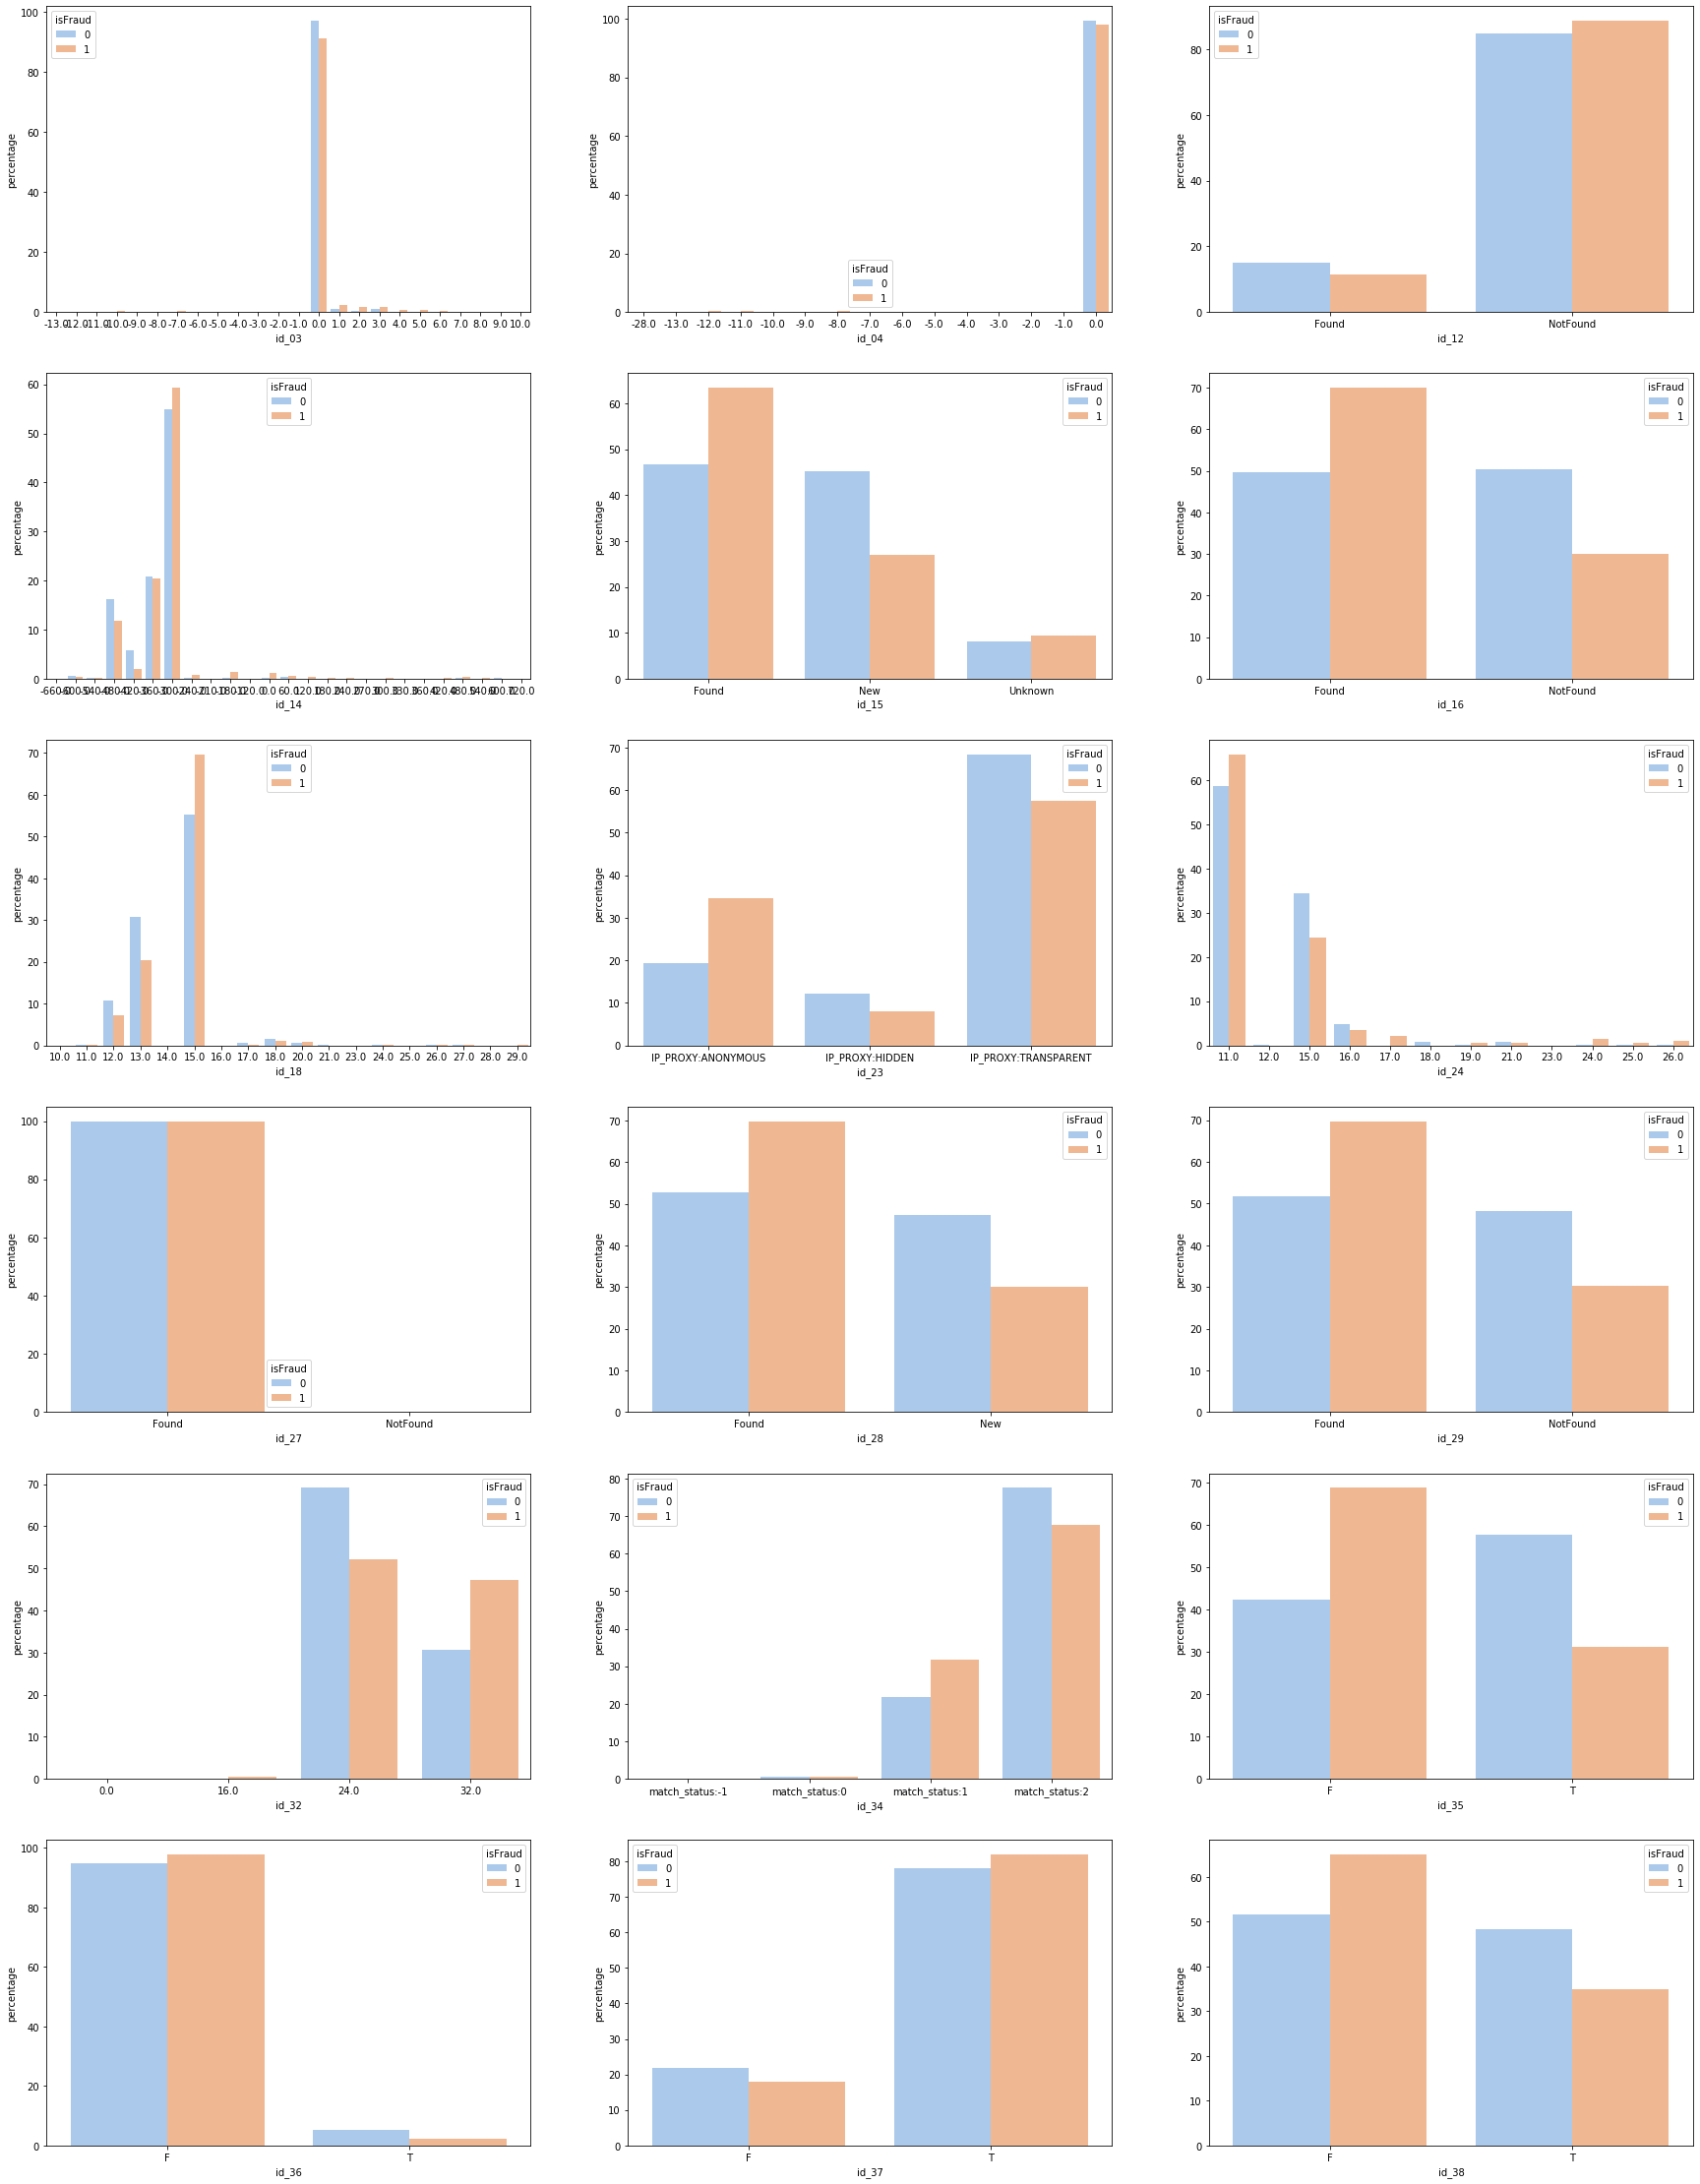

In [220]:
plt.figure(figsize=(30,40))
var = ['train_id_' + str(i) for i in range(1,19)]
col = ['id_'+str(i) for i in ['03','04',12,14,15,16,18,23,24,27,28,29,32,34,35,36,37,38]]
for i,j,k in zip(var,col,range(1,19)):
    i = (train.groupby(['isFraud'])[j]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(j))
    plt.subplot(6,3,k)
    sns.barplot(x=j, y="percentage", hue="isFraud", data=i, palette = 'pastel')
plt.show()

In [283]:
gc.collect()

32

Other than the categorical variables above, let's take a closer look to the id 30, 31, 33 as well since they are object type

In [271]:
train['id_30'].value_counts().head()         # Device info?

Windows 10     21154
Windows 7      13110
iOS 11.2.1      3722
iOS 11.1.2      3699
Android 7.0     2871
Name: id_30, dtype: int64

In [183]:
# https://medium.com/@gtavicecity581/ieee-fraud-detection-469398ce1ac4
train['OS_id_30'] = train['id_30'].str.split(' ', expand=True)[0]
train['version_id_30'] = train['id_30'].str.split(' ', expand=True)[1]
test['OS_id_30'] = test['id_30'].str.split(' ', expand=True)[0]
test['version_id_30'] = test['id_30'].str.split(' ', expand=True)[1]

In [272]:
train['id_31'].value_counts().head() # Browser info

chrome 63.0              21861
mobile safari 11.0       13305
mobile safari generic    11458
ie 11.0 for desktop       9016
safari generic            8180
Name: id_31, dtype: int64

In [184]:
train['browser_id_31'] = train['id_31'].str.split(' ', expand=True)[0].value_counts()
train['version_id_31'] = train['id_31'].str.split(' ', expand=True)[1].value_counts()
test['browser_id_31'] = test['id_31'].str.split(' ', expand=True)[0].value_counts()
test['version_id_31'] = test['id_31'].str.split(' ', expand=True)[1].value_counts()

In [273]:
train['id_33'].value_counts().head() # Device Resolution

1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
Name: id_33, dtype: int64

In [185]:
train['resol_width_id_31'] = train['id_33'].str.split('x', expand=True)[0].value_counts()
train['resol_height_id_31'] = train['id_33'].str.split('x', expand=True)[1].value_counts()
test['resol_width_id_31'] = test['id_33'].str.split('x', expand=True)[0].value_counts()
test['resol_height_id_31'] = test['id_33'].str.split('x', expand=True)[1].value_counts()

In [186]:
train['OS_id_30'] = train['id_30'].str.split(' ', expand=True)[0]
train['version_id_30'] = train['id_30'].str.split(' ', expand=True)[1]
test['OS_id_30'] = test['id_30'].str.split(' ', expand=True)[0]
test['version_id_30'] = test['id_30'].str.split(' ', expand=True)[1]

train['browser_id_31'] = train['id_31'].str.split(' ', expand=True)[0].value_counts()
train['version_id_31'] = train['id_31'].str.split(' ', expand=True)[1].value_counts()
test['browser_id_31'] = test['id_31'].str.split(' ', expand=True)[0].value_counts()
test['version_id_31'] = test['id_31'].str.split(' ', expand=True)[1].value_counts()

train['resol_width_id_31'] = train['id_33'].str.split('x', expand=True)[0].value_counts()
train['resol_height_id_31'] = train['id_33'].str.split('x', expand=True)[1].value_counts()
test['resol_width_id_31'] = test['id_33'].str.split('x', expand=True)[0].value_counts()
test['resol_height_id_31'] = test['id_33'].str.split('x', expand=True)[1].value_counts()

### DeviceType and DeviceInfo

In [228]:
train[~train.iloc[:, 431:433].isnull().any(axis=1)].iloc[:, 431:433].head()

DeviceType                     DeviceInfo
4      mobile  SAMSUNG SM-G892A Build/NRD90M
8      mobile                     iOS Device
10    desktop                        Windows
16    desktop                          MacOS
17    desktop                        Windows

In [237]:
print(len(train['DeviceType'].value_counts()))
print(len(train['DeviceInfo'].value_counts()))

2
1782


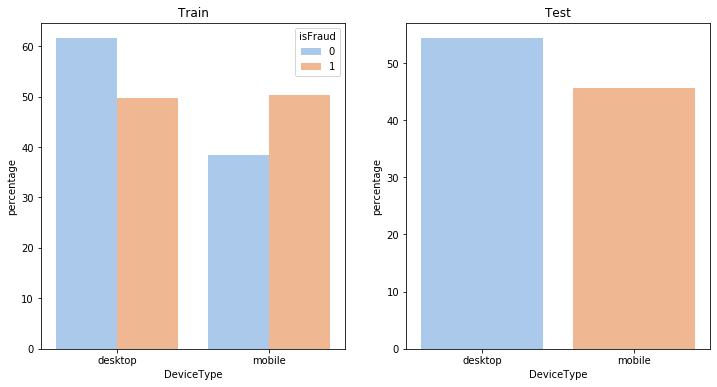

In [236]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_DeviceType = (train[~train['DeviceType'].isnull()].groupby(['isFraud'])['DeviceType'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DeviceType'))
sns.barplot(x="DeviceType", y="percentage", hue="isFraud", data=train_DeviceType, palette = 'pastel')
plt.title('Train')
plt.subplot(1,2,2)
test_DeviceType =test[~test['DeviceType'].isnull()]['DeviceType'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index", y="percentage", data=test_DeviceType, palette = 'pastel')
plt.xlabel('DeviceType')
plt.title('Test')
plt.show()

Both Desktop and mobile have the same percentage of fraud.

In [252]:
train['DeviceInfo'].value_counts().head(10)

Windows                  47526
iOS Device               19781
MacOS                    12573
Trident/7.0               7428
rv:11.0                   1899
rv:57.0                    949
SM-J700M Build/MMB29K      530
SM-G610M Build/MMB29K      452
SM-G531H Build/LMY48B      402
rv:59.0                    362
Name: DeviceInfo, dtype: int64

Let's create a new feature by grouping the similar devices

In [187]:
# Reference: https://www.kaggle.com/jolly2136/eda-fe-xgb
def transform_DeviceInfo(df):
    df['DeviceCorp'] = df['DeviceInfo']
    df.loc[df['DeviceInfo'].str.contains('HUAWEI|HONOR', case=False, na=False, regex=True), 'DeviceCorp'] = 'HUAWEI'
    df.loc[df['DeviceInfo'].str.contains('OS', na=False, regex=False), 'DeviceCorp'] = 'APPLE'
    df.loc[df['DeviceInfo'].str.contains('Idea|TA', case=False, na=False), 'DeviceCorp'] = 'Lenovo'
    df.loc[df['DeviceInfo'].str.contains('Moto|XT|Edison', case=False, na=False), 'DeviceCorp'] = 'Moto'
    df.loc[df['DeviceInfo'].str.contains('MI|Mi|Redmi', na=False), 'DeviceCorp'] = 'Mi'
    df.loc[df['DeviceInfo'].str.contains('VS|LG|EGO', na=False), 'DeviceCorp'] = 'LG'
    df.loc[df['DeviceInfo'].str.contains('ONE TOUCH|ALCATEL', case=False, na=False, regex=False), 'DeviceCorp'] = 'ALCATEL'
    df.loc[df['DeviceInfo'].str.contains('ONE A', na=False, regex=False), 'DeviceCorp'] = 'ONEPLUS'
    df.loc[df['DeviceInfo'].str.contains('OPR6', na=False, regex=False), 'DeviceCorp'] = 'HTC'
    df.loc[df['DeviceInfo'].str.contains('Nexus|Pixel', case=False, na=False, regex=True), 'DeviceCorp'] = 'google'
    df.loc[df['DeviceInfo'].str.contains('STV', na=False, regex=False), 'DeviceCorp'] = 'blackberry'
    df.loc[df['DeviceInfo'].str.contains('ASUS', case=False, na=False, regex=False), 'DeviceCorp'] = 'ASUS'
    df.loc[df['DeviceInfo'].str.contains('BLADE', case=False, na=False, regex=False), 'DeviceCorp'] = 'ZTE'
    
    df['DeviceCorp'] = df['DeviceInfo'].astype('str').str.split(':', expand=True)[0].\
                                str.split('-', expand=True)[0].str.split(expand=True)[0]
    
    df.loc[df['DeviceInfo'].isin(['rv', 'SM', 'GT', 'SGH']), 'DeviceCorp'] = 'SAMSUNG'
    df.loc[df['DeviceInfo'].str.startswith('Z', na=False), 'DeviceCorp'] = 'ZTE'
    df.loc[df['DeviceInfo'].str.startswith('KF', na=False), 'DeviceCorp'] = 'Amazon'
    
    for i in ['D', 'E', 'F', 'G']:
        df.loc[df['DeviceInfo'].str.startswith(i, na=False), 'DeviceCorp'] = 'SONY'

    df.loc[df['DeviceCorp'].isin(df['DeviceCorp'].value_counts()\
                                 [df['DeviceCorp'].value_counts() < 100].index), 'DeviceCorp'] = 'Other'
    df['DeviceCorp'] = df['DeviceCorp'].str.upper()
    
    return df

In [188]:
train = transform_DeviceInfo(train)
test = transform_DeviceInfo(test)

In [247]:
train.DeviceCorp

0             NAN
1             NAN
2             NAN
3             NAN
4         SAMSUNG
           ...   
590535        NAN
590536        NAN
590537        NAN
590538        NAN
590539        NAN
Name: DeviceCorp, Length: 589527, dtype: object

Change the NAN into np.nan

In [189]:
def settingNaN(value):
    if value=='NAN':
        return np.nan
    else:
        return value
    
train['DeviceCorp'] = train['DeviceCorp'].apply(settingNaN)
test['DeviceCorp'] = test['DeviceCorp'].apply(settingNaN)

In [250]:
train.DeviceCorp.head()

0        NaN
1        NaN
2        NaN
3        NaN
4    SAMSUNG
Name: DeviceCorp, dtype: object

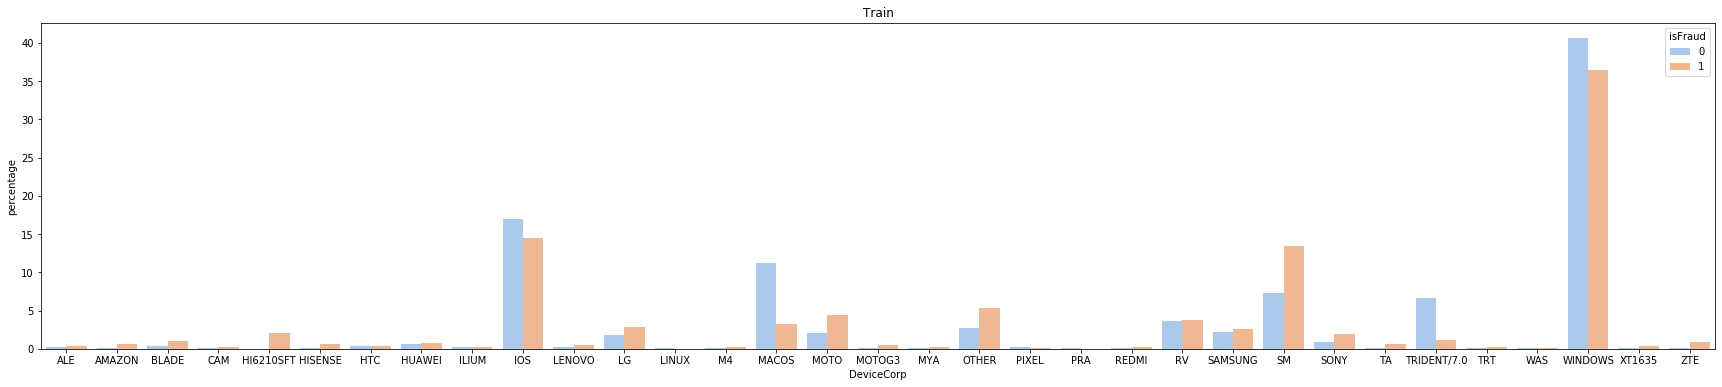

In [256]:
plt.figure(figsize=(30,6))
train_DeviceCorp = (train[~train['DeviceCorp'].isnull()].groupby(['isFraud'])['DeviceCorp'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DeviceCorp'))
sns.barplot(x="DeviceCorp", y="percentage", hue="isFraud", data=train_DeviceCorp, palette = 'pastel')
plt.title('Train')
plt.show()

In [190]:
train

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN         NoInf         NoInf  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN        Google         NoInf  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN     Microsoft         NoInf  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN         Yahoo         NoInf  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN        Google         NoInf  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN         NoInf         NoInf  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN        Google         NoInf  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN        Google         NoInf  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com         NoInf  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN        Google         NoInf  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [29]:
gc.collect()

130

## Modeling

In [299]:
# basic
import pandas as pd
import numpy as np
import warnings
# others
warnings.filterwarnings("ignore")
import gc
import copy
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)
# sklearn
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, f1_score, SCORERS, make_scorer, fbeta_score, roc_curve, auc, plot_roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
# Visual
import graphviz

In [31]:
# Reducing memory usage
# From https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA
def reduce_mem_usage2(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [32]:
train = reduce_mem_usage2(train)
test = reduce_mem_usage2(test) 

Memory usage of dataframe is 2001.49 MB
Memory usage after optimization is: 549.97 MB
Decreased by 72.5%
Memory usage of dataframe is 1716.39 MB
Memory usage after optimization is: 479.96 MB
Decreased by 72.0%


In [33]:
train.dtypes.head()

TransactionID        int32
isFraud               int8
TransactionDT        int32
TransactionAmt     float16
ProductCD         category
dtype: object

### Additional Feature Engineering

In [191]:
# Reference: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook#Some-feature-engineering
train['Trans_min_mean'] = train['TransactionAmt'] - train['TransactionAmt'].mean()
train['Trans_min_std'] = train['Trans_min_mean'] / train['TransactionAmt'].std()
test['Trans_min_mean'] = test['TransactionAmt'] - test['TransactionAmt'].mean()
test['Trans_min_std'] = test['Trans_min_mean'] / test['TransactionAmt'].std()
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / \
    train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / \
    train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / \
    train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card4'] = train['TransactionAmt'] / \
    train.groupby(['card4'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / \
    test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card4'] = test['TransactionAmt'] / \
    test.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_std_card1'] = test['TransactionAmt'] / \
    test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_std_card4'] = test['TransactionAmt'] / \
    test.groupby(['card4'])['TransactionAmt'].transform('std')

### Label Encoding

In [192]:
cat_cols = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
            'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29','id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36',
            'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'hour_warning', 'new_card3', 'DeviceCorp', 'OS_id_30',
            'version_id_30', 'browser_id_31', 'version_id_31', 'resol_width_id_31', 'resol_height_id_31']
for col in cat_cols:
    if col in train.columns:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))   

### PCA
Compress V features through PCA

In [197]:
test['isFraud'] = 'test'
df = pd.concat([train, test], axis=0, sort=False)
df = df.reset_index()
df = df.drop('index', axis=1)

In [153]:
# https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook#Concating-dfs-to-get-PCA-of-V-features
def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)

    principalComponents = pca.fit_transform(df[cols])

    principalDf = pd.DataFrame(principalComponents)

    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df = pd.concat([df, principalDf], axis=1)
    
    return df

In [198]:
mas_v = train.columns[55:393]

In [ ]:
for col in mas_v:
    df[col] = df[col].fillna((df[col].min() - 2))
    df[col] = (minmax_scale(df[col], feature_range=(0,1)))

In [205]:
pca = PCA(n_components=338, random_state=4)
pca.fit(df[mas_v])

PCA(copy=True, iterated_power='auto', n_components=338, random_state=4,
    svd_solver='auto', tol=0.0, whiten=False)

In [208]:
# pca.explained_variance_ratio_

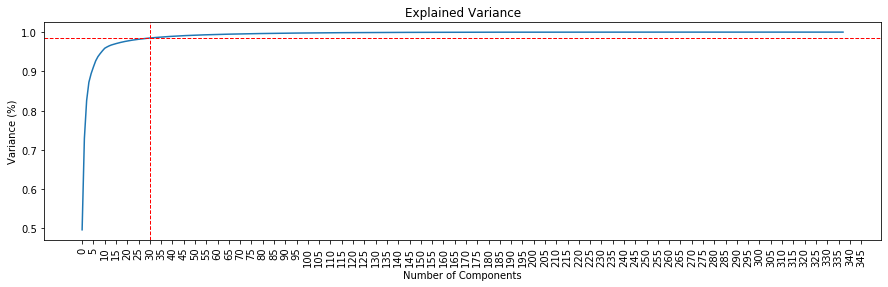

In [232]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(15,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=30, c="r", ls="--", lw=1)
plt.axhline(y=0.986, c="r", ls="--", lw=1)
plt.xticks(np.arange(0, 350, 5), rotation=90)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

30 of components can explain around 98.6% of variance. Let's set the n_components as 30.

In [200]:
df = PCA_change(df, mas_v, prefix='PCA_V_', n_components=30)

In [40]:
df = reduce_mem_usage2(df)

Memory usage of dataframe is 620.99 MB
Memory usage after optimization is: 280.18 MB
Decreased by 54.9%


In [41]:
train, test = df[df['isFraud'] != 'test'], df[df['isFraud'] == 'test'].drop('isFraud', axis=1)

### Setting X and y

In [42]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT','TransactionID'], axis=1)
y = train.sort_values('TransactionDT')['isFraud'].astype(bool)

test = test.sort_values('TransactionDT').drop(['TransactionDT','TransactionID'], axis=1)

In [43]:
# X.head()

In [44]:
# test.head()

In [45]:
print('train shape: %d, %d' %(train.shape[0],train.shape[1]))
print('test shape: %d, %d' %(test.shape[0],test.shape[1]))
print('X shape: %d, %d' %(X.shape[0],X.shape[1]))
print('y shape: %d, 1' %(y.shape[0]))

train shape: 589527, 142
test shape: 506691, 139
X shape: 589527, 139
y shape: 589527, 1


### Imputing Missing Value

In [47]:
X_ = X.copy()
test_ = test.copy()

In [48]:
def fillna(df):
    df.fillna(-999, inplace = True)
    
fillna(X)
fillna(test)

In [49]:
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
X = clean_inf_nan(X)
test = clean_inf_nan(test)

### Train-test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45, stratify=y)

In [45]:
# X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.30, random_state=45, stratify=y)

In [51]:
fillna(X_train)
fillna(X_test)

In [ ]:
del train, X, y

In [53]:
# output csv..
train.to_csv('train_for_modeling.csv', index=False)
test.to_csv('test_for_modeling.csv', index=False)

## Decision-Tree
We build decision tree models here as both a benchmark of the following models and a simplest model with a relatively strong interpretability.

In [57]:
# Base model with default hyperparameters
base_tree = DecisionTreeClassifier(class_weight='balanced', random_state = 42)
base_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [56]:
print('Parameters currently in use:\n')
pprint(base_tree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [59]:
print('The number of leaves of the base tree: {:d}'.format(base_tree.get_n_leaves()))
print('The depth of the base tree: {:d}'.format(base_tree.get_depth()))

The number of leaves of the base tree: 11377
The depth of the base tree: 76


In [58]:
base_tree_train_predict = base_tree.predict_proba(X_train)
base_tree_test_predict = base_tree.predict_proba(X_test)
print('base tree train auc:', roc_auc_score(y_train, base_tree_train_predict[:,1]))
print('base tree test auc:', roc_auc_score(y_test, base_tree_test_predict[:,1]))

base tree train auc: 1.0
base tree test auc: 0.7576970036552667


We got a purely overfitting tree model. Let's tune it using randomized grid search first.

In [60]:
# Function to measure the quality of a split
criterion = ['gini', 'entropy']
# Strategy used to choose the split at each node, random selects a set of features randomly and splits,
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 210, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# The number of features to consider when looking for the best split
max_features = ['auto', 'log2', None]
# Maximum number of leaf nodes
max_leaf_nodes = [int(x) for x in np.linspace(10, 210, num = 11)]
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000 , 12000, 15000, None]
# Split threshold of a decrease of the impurity
min_impurity_decrease = [0, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01, 0.02]
# Complexity parameter used for Minimal Cost-Complexity Pruning
ccp_alpha = [x for x in np.linspace(0, 0.05, num = 11)]
# Create the random grid
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_impurity_decrease': min_impurity_decrease,
               'ccp_alpha': ccp_alpha}

pprint(random_grid)

{'ccp_alpha': [0.0,
               0.005,
               0.01,
               0.015,
               0.02,
               0.025,
               0.03,
               0.035,
               0.04,
               0.045,
               0.05],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, None],
 'max_features': ['auto', 'log2', None],
 'max_leaf_nodes': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210],
 'min_impurity_decrease': [0,
                           5e-05,
                           0.0001,
                           0.0002,
                           0.0005,
                           0.001,
                           0.0015,
                           0.002,
                           0.005,
                           0.01,
                           0.02],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 15, 30, 50, 100],
 'splitter': ['best', 'random']}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune: base_tree
# Random search of parameters with auc_roc scoring, using 3 fold stratified cross validation,
skf = StratifiedKFold(n_splits=3, random_state=42)
# search across 60 different combinations, and use all available cores
tree_random = RandomizedSearchCV(estimator = base_tree, param_distributions = random_grid, n_iter = 60, cv = skf, scoring = 'roc_auc', verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
tree_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf...
                                        'max_leaf_nodes': [10, 30, 50, 70,

In [63]:
best_random_tree_train_predict = tree_random.predict_proba(X_train)
best_random_tree_test_predict = tree_random.predict_proba(X_test)
print('best random tree train auc:', roc_auc_score(y_train, best_random_tree_train_predict[:,1]))
print('best random tree test auc:', roc_auc_score(y_test, best_random_tree_test_predict[:,1]))

base tree train auc: 0.8192459786242714
base tree test auc: 0.8181009066666587


Tuned decision tree performs well, least overfitting. No need to do grid search further.

In [121]:
print('Tuned best random Hyperparameters:\n')
pprint(tree_random.best_estimator_.get_params())

Tuned best random Hyperparameters:

{'ccp_alpha': 0.005,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 170,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_impurity_decrease': 0.0005,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [83]:
tree_random.best_estimator_.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.        , 0.00182748, 0.00191446, 0.00195138, 0.00229596,
        0.00230245, 0.00242485, 0.00243824, 0.00244624, 0.00267807,
        0.00280115, 0.00316236, 0.00349712, 0.00369571, 0.00375561,
        0.00384169, 0.00450224, 0.00482236, 0.00593574, 0.00658868,
        0.00826239, 0.01877894, 0.03074861, 0.04138827, 0.06335782,
        0.08928084]),
 'impurities': array([0.67162571, 0.67345318, 0.67536765, 0.67731903, 0.67961499,
        0.68191743, 0.68434229, 0.68678052, 0.68922677, 0.69726098,
        0.70006213, 0.70322449, 0.71021873, 0.71391444, 0.71767005,
        0.72151174, 0.72601398, 0.7356587 , 0.74159445, 0.74818312,
        0.75644552, 0.77522446, 0.80597306, 0.84736133, 0.91071916,
        1.        ])}

In [78]:
print('The number of leaves of the best random tree: {:d}'.format(tree_random.best_estimator_.get_n_leaves()))
print('The depth of the best random tree: {:d}'.format(tree_random.best_estimator_.get_depth()))

The number of leaves of the best random tree: 9
The depth of the best random tree: 4


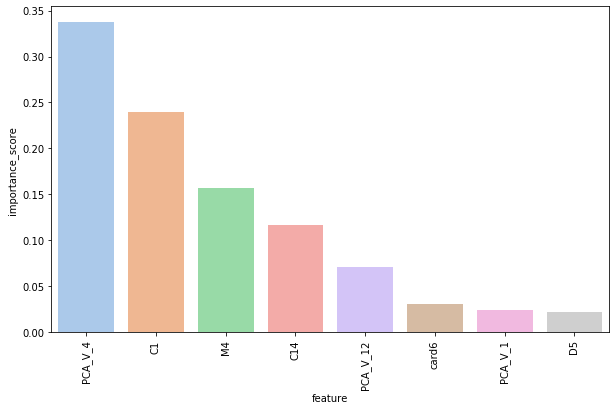

In [141]:
# visualize features with importantce score > 0
best_random_tree = tree_random.best_estimator_
plt.figure(figsize=(10,6))
sorted_importance_tree = sorted(zip(X_train.columns, best_random_tree.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_useful_tree = [ i for i in sorted_importance_tree if i[1] > 0]
a, b = zip(*sorted_importance_useful_tree)
fp = pd.DataFrame({'feature':a, 'importance_score':b})[:15]
sns.barplot(x="feature", y="importance_score", data=fp, palette = 'pastel')
plt.xticks(rotation=90)
plt.show()

In [139]:
sorted_importance_tree

[('PCA_V_4', 0.3377483723358111),
 ('C1', 0.23968189302813125),
 ('M4', 0.15657134109069462),
 ('C14', 0.11632160960695319),
 ('PCA_V_12', 0.0710405141382658),
 ('card6', 0.03125653269416357),
 ('PCA_V_1', 0.024924885660445126),
 ('D5', 0.022454851445535346),
 ('TransactionAmt', 0.0),
 ('ProductCD', 0.0),
 ('card1', 0.0),
 ('card2', 0.0),
 ('card3', 0.0),
 ('card4', 0.0),
 ('card5', 0.0),
 ('addr1', 0.0),
 ('addr2', 0.0),
 ('dist1', 0.0),
 ('dist2', 0.0),
 ('P_emaildomain', 0.0),
 ('R_emaildomain', 0.0),
 ('C2', 0.0),
 ('C3', 0.0),
 ('C4', 0.0),
 ('C5', 0.0),
 ('C6', 0.0),
 ('C7', 0.0),
 ('C8', 0.0),
 ('C9', 0.0),
 ('C10', 0.0),
 ('C11', 0.0),
 ('C12', 0.0),
 ('C13', 0.0),
 ('D1', 0.0),
 ('D2', 0.0),
 ('D3', 0.0),
 ('D4', 0.0),
 ('D6', 0.0),
 ('D7', 0.0),
 ('D8', 0.0),
 ('D9', 0.0),
 ('D10', 0.0),
 ('D11', 0.0),
 ('D12', 0.0),
 ('D13', 0.0),
 ('D14', 0.0),
 ('D15', 0.0),
 ('M1', 0.0),
 ('M2', 0.0),
 ('M3', 0.0),
 ('M5', 0.0),
 ('M6', 0.0),
 ('M7', 0.0),
 ('M8', 0.0),
 ('M9', 0.0),
 ('i

In [142]:
sorted_importance_useful_tree

[('PCA_V_4', 0.3377483723358111),
 ('C1', 0.23968189302813125),
 ('M4', 0.15657134109069462),
 ('C14', 0.11632160960695319),
 ('PCA_V_12', 0.0710405141382658),
 ('card6', 0.03125653269416357),
 ('PCA_V_1', 0.024924885660445126),
 ('D5', 0.022454851445535346)]

In [72]:
# draw a tree graph
dot_data = tree.export_graphviz(tree_random.best_estimator_, out_file=None, 
                    feature_names=X_train.columns.to_list(),  
                    class_names=['Legit', 'Fraud'],  
                    filled=True, rounded=True,  
                    special_characters=True) 

graph = graphviz.Source(dot_data)  
# #this will create an best_random_tree.pdf file with the rule path
graph.render("best_random_tree", view=True)

'best_random_tree.pdf'

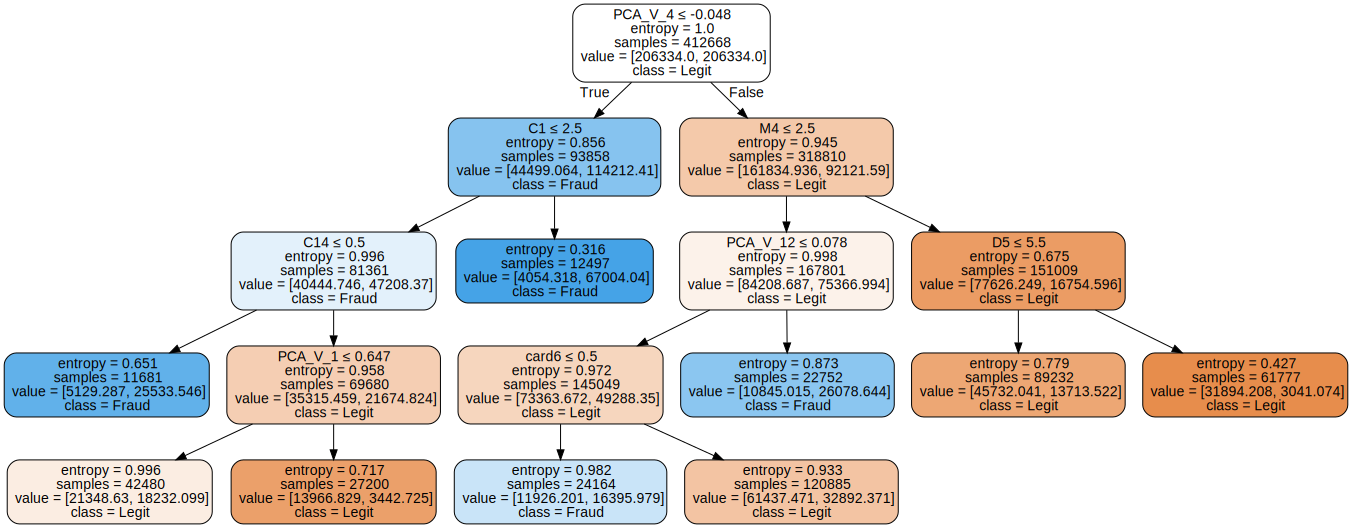

In [79]:
graph

## Random Forest

In [100]:
base_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
base_rf.fit(X_train, y_train)
base_rf_train_predict = base_rf.predict_proba(X_train)
base_rf_test_predict = base_rf.predict_proba(X_test)
print('base random forest train auc:', roc_auc_score(y_train, base_rf_train_predict[:,1]))
print('base random forest test auc:', roc_auc_score(y_test, base_rf_test_predict[:,1]))

base random forest train auc: 1.0
base random forest test auc: 0.9336799013020765


In [101]:
print('Parameters currently in use:\n')
pprint(base_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Severe overfitting. Let's tune it as what we did on the decision tree above.

In [126]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 15)]
# Function to measure the quality of a split
criterion = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# The number of features to consider when looking for the best split
max_features = ['auto', 'log2', None]
# Maximum number of leaf nodes
max_leaf_nodes = [int(x) for x in np.linspace(10, 210, num = 11)]
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000 , 12000, 15000, None]
# Split threshold of a decrease of the impurity
min_impurity_decrease = [0, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01, 0.02]
# Complexity parameter used for Minimal Cost-Complexity Pruning
ccp_alpha = [x for x in np.linspace(0, 0.05, num = 11)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_impurity_decrease': min_impurity_decrease,
               'ccp_alpha': ccp_alpha,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'ccp_alpha': [0.0,
               0.005,
               0.01,
               0.015,
               0.02,
               0.025,
               0.03,
               0.035,
               0.04,
               0.045,
               0.05],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'log2', None],
 'max_leaf_nodes': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210],
 'min_impurity_decrease': [0,
                           5e-05,
                           0.0001,
                           0.0002,
                           0.0005,
                           0.001,
                           0.0015,
                           0.002,
                           0.005,
                           0.01,
                           0.02],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 15, 30, 50, 100],
 'n_estimators': [10,
                  80,
            

In [128]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune: base_rf
# Random search of parameters with auc_roc scoring, using 3 fold stratified cross validation,
skf = StratifiedKFold(n_splits=3, random_state=42)
# search across 60 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = base_rf, param_distributions = random_grid, n_iter = 60, 
                               cv = skf, scoring = 'roc_auc', verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)、、

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_sample...
                     

In [129]:
gc.collect()

21744

In [130]:
best_random_rf_train_predict = rf_random.predict_proba(X_train)
best_random_rf_test_predict = rf_random.predict_proba(X_test)
print('best random forest train auc from randomized search:', roc_auc_score(y_train, best_random_rf_train_predict[:,1]))
print('best random tree test auc from randomized search:', roc_auc_score(y_test, best_random_rf_test_predict[:,1]))

best random forest train auc from randomized search: 0.9002496311407584
best random tree test auc from randomized search: 0.8902467384409034


Only a little overfitting. No need to further tune.

In [131]:
print('Tuned best random rf Hyperparameters:\n')
pprint(rf_random.best_estimator_.get_params())

Tuned best random rf Hyperparameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'max_leaf_nodes': 150,
 'max_samples': None,
 'min_impurity_decrease': 5e-05,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 646,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


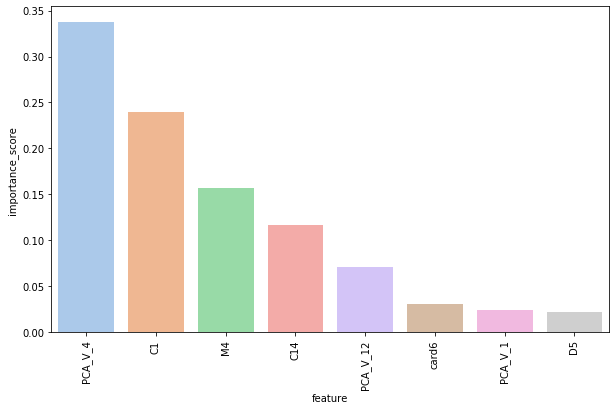

In [135]:
# visualize features with importantce score > 0
best_random_tree = tree_random.best_estimator_
plt.figure(figsize=(10,6))
sorted_importance_rf = sorted(zip(X_train.columns, best_random_tree.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_useful_rf = [ i for i in sorted_importance_rf if i[1] > 0]
a, b = zip(*sorted_importance_useful_rf)
fp = pd.DataFrame({'feature':a, 'importance_score':b})[:15]
sns.barplot(x="feature", y="importance_score", data=fp, palette = 'pastel')
plt.xticks(rotation=90)
plt.show()

In [136]:
sorted_importance_rf

[('PCA_V_4', 0.3377483723358111),
 ('C1', 0.23968189302813125),
 ('M4', 0.15657134109069462),
 ('C14', 0.11632160960695319),
 ('PCA_V_12', 0.0710405141382658),
 ('card6', 0.03125653269416357),
 ('PCA_V_1', 0.024924885660445126),
 ('D5', 0.022454851445535346),
 ('TransactionAmt', 0.0),
 ('ProductCD', 0.0),
 ('card1', 0.0),
 ('card2', 0.0),
 ('card3', 0.0),
 ('card4', 0.0),
 ('card5', 0.0),
 ('addr1', 0.0),
 ('addr2', 0.0),
 ('dist1', 0.0),
 ('dist2', 0.0),
 ('P_emaildomain', 0.0),
 ('R_emaildomain', 0.0),
 ('C2', 0.0),
 ('C3', 0.0),
 ('C4', 0.0),
 ('C5', 0.0),
 ('C6', 0.0),
 ('C7', 0.0),
 ('C8', 0.0),
 ('C9', 0.0),
 ('C10', 0.0),
 ('C11', 0.0),
 ('C12', 0.0),
 ('C13', 0.0),
 ('D1', 0.0),
 ('D2', 0.0),
 ('D3', 0.0),
 ('D4', 0.0),
 ('D6', 0.0),
 ('D7', 0.0),
 ('D8', 0.0),
 ('D9', 0.0),
 ('D10', 0.0),
 ('D11', 0.0),
 ('D12', 0.0),
 ('D13', 0.0),
 ('D14', 0.0),
 ('D15', 0.0),
 ('M1', 0.0),
 ('M2', 0.0),
 ('M3', 0.0),
 ('M5', 0.0),
 ('M6', 0.0),
 ('M7', 0.0),
 ('M8', 0.0),
 ('M9', 0.0),
 ('i

In [137]:
sorted_importance_useful_rf

[('PCA_V_4', 0.3377483723358111),
 ('C1', 0.23968189302813125),
 ('M4', 0.15657134109069462),
 ('C14', 0.11632160960695319),
 ('PCA_V_12', 0.0710405141382658),
 ('card6', 0.03125653269416357),
 ('PCA_V_1', 0.024924885660445126),
 ('D5', 0.022454851445535346)]

## LightGBM

base case - metric: roc auc score

In [233]:
base_lgbm = LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
base_lgbm.fit(X_train, y_train)
base_lgbm_train_predict = base_lgbm.predict_proba(X_train)
base_lgbm_test_predict = base_lgbm.predict_proba(X_test)
print('base lgbm train auc:', roc_auc_score(y_train, base_lgbm_train_predict[:,1]))
print('base lgbm test auc:', roc_auc_score(y_test, base_lgbm_test_predict[:,1]))

base lgbm train auc: 0.9458831660557384
base lgbm test auc: 0.9257847032550952


In [404]:
# default hyperparameters with missing values not imputed, class_weight = 'balanced'
base_lgbm_not_imputed = LGBMClassifier(class_weight='balanced')
base_lgbm_not_imputed.fit(X_train_, y_train_)
predict_y_ = lgbm_default.predict_proba(X_train_)
predict_y  = lgbm_default.predict_proba(X_test_)
print('base_lgbm_not_imputed train auc:', roc_auc_score(y_train_, predict_y_[:,1]))
print('base_lgbm_not_imputed test auc:', roc_auc_score(y_test_, predict_y[:,1]))

train auc: 0.9465175211117597
cv auc: 0.9264012383316904


Missing value not imputed has slightly higher scores... But we will still build models with missing values imputed.

In [272]:
print('Parameters currently in use:\n')
pprint(base_lgbm.get_params())

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [354]:
# plot_roc_curve(base_lgbm, X_test, y_test)
# plt.show() 

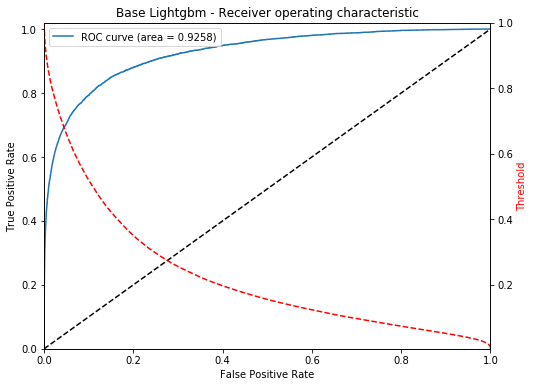

In [656]:
y_scores = base_lgbm_test_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % (auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Base Lightgbm - Receiver operating characteristic')
plt.legend(loc="best")

# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],1])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.show()
# plt.axhline(y=0.0, c="r", ls="--", lw=2)
# plt.axvline(x=4.0, c="r", ls="--", lw=2)

In [639]:
gc.collect()

20

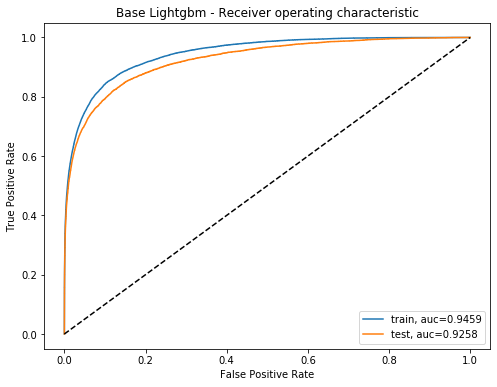

In [653]:
plt.figure(figsize=(8,6))
# auc of train
fpr, tpr, thresh = roc_curve(y_train, base_lgbm_train_predict[:,1])
auc = roc_auc_score(y_train, base_lgbm_train_predict[:,1])
plt.plot(fpr,tpr,label="train, auc="+str(round(auc,4)))
# auc of test
fpr, tpr, thresh = roc_curve(y_test, base_lgbm_test_predict[:,1])
auc = roc_auc_score(y_test, base_lgbm_test_predict[:,1])
plt.plot(fpr,tpr,label="test, auc="+str(round(auc,4)))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Base Lightgbm - Receiver operating characteristic')
plt.show()

In [456]:
# output to csv, submit to leaderboard for the first time
y_preds = lgbm_default.predict_proba(test)[:,1] 
sample_submission['isFraud'] = y_preds
sample_submission.to_csv('lgbm_default_model.csv',index=False)

## Tune LightGBM
randomized search - metric: ROC_AUC

In [60]:
lgbm = LGBMClassifier(class_weight='balanced', boosting_type='gbdt', n_jobs=-1)
kf = StratifiedKFold(n_splits=3, shuffle=True)
random_grid = {
            'learning_rate': np.linspace(0.01, 0.2, num=11),
            'n_estimators': range(100, 1001, 100),
            'max_depth ': range(-1, 25, 2),
            'reg_alpha': np.linspace(0.01, 0.4, num=20),
            'reg_lambda': np.linspace(0.01, 0.4, num=20),
            'colsample_bytree': np.linspace(0.3, 0.9, num=20),
            'num_leaves': range(20, 300, 10),
            'min_child_samples': [20, 250, 10],
            'subsample': np.linspace(0.2, 0.9, num=20),
            'subsample_freq': range(0, 20, 2),
            'verbose': [1]}

lgbm_random = RandomizedSearchCV(lgbm, param_distributions=random_grid, n_iter=200, scoring='roc_auc',
                               cv=kf, return_train_score=True, n_jobs=-1)

In [62]:
lgbm_random.fit(X_train_, y_train_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight='balanced',
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, obj...
                                        'subsample': array([0.2       , 0.23684211, 0.27368421, 0.31052632, 0.34736842,
       0.38421053, 0.42105263, 0.45789474, 0.49473684, 0.53157895,
       0.

In [92]:
lgbm_random.best_params_

{'verbose': 1,
 'subsample_freq': 8,
 'subsample': 0.9,
 'reg_lambda': 0.3178947368421053,
 'reg_alpha': 0.3178947368421053,
 'num_leaves': 220,
 'n_estimators': 700,
 'min_child_samples': 20,
 'max_depth ': 5,
 'learning_rate': 0.048,
 'colsample_bytree': 0.868421052631579}

In [621]:
best_random_grid = {'verbose': 0,
                 'subsample_freq': 8,
                 'subsample': 0.9,
                 'reg_lambda': 0.3178947368421053,
                 'reg_alpha': 0.3178947368421053,
                 'num_leaves': 220,
                 'n_estimators': 700,
                 'min_child_samples': 20,
                 'max_depth ': 5,
                 'learning_rate': 0.048,
                 'colsample_bytree': 0.868421052631579}

In [620]:
best_random_lgbm = LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [623]:
best_random_lgbm.set_params(**best_random_grid)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.868421052631579, importance_type='split',
               learning_rate=0.048, max_depth=-1, max_depth =5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=700, n_jobs=-1, num_leaves=220, objective=None,
               random_state=42, reg_alpha=0.3178947368421053,
               reg_lambda=0.3178947368421053, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=8, verbose=0)

In [625]:
best_random_lgbm.fit(X_train, y_train)
best_lgbm_train_predict = best_random_lgbm.predict_proba(X_train)
best_lgbm_test_predict = best_random_lgbm.predict_proba(X_test)
print('best random lgbm train auc:', roc_auc_score(y_train, best_lgbm_train_predict[:,1]))
print('best random lgbm test auc:', roc_auc_score(y_test, best_lgbm_test_predict[:,1]))

best random lgbm train auc: 0.9999494843445679
best random lgbm test auc: 0.9625733120040851


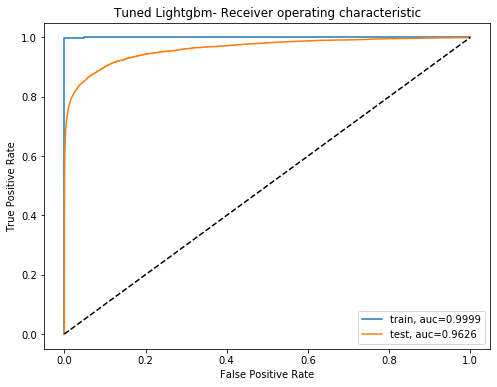

In [657]:
plt.figure(figsize=(8,6))
# auc of train
fpr, tpr, thresh = roc_curve(y_train, best_lgbm_train_predict[:,1])
auc = roc_auc_score(y_train, best_lgbm_train_predict[:,1])
plt.plot(fpr,tpr,label="train, auc="+str(round(auc,4)))
# auc of test
fpr, tpr, thresh = roc_curve(y_test, best_lgbm_test_predict[:,1])
auc = roc_auc_score(y_test, best_lgbm_test_predict[:,1])
plt.plot(fpr,tpr,label="test, auc="+str(round(auc,4)))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Lightgbm- Receiver operating characteristic')
plt.show()

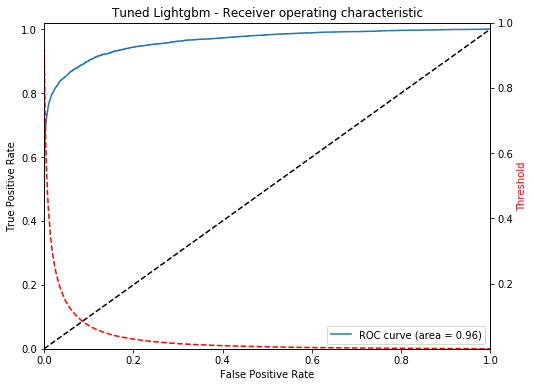

In [658]:
y_scores = best_lgbm_test_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# auc(fpr, tpr) # auc has been assigned as a variable by the above plot's code
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Lightgbm - Receiver operating characteristic')
plt.legend(loc="best")

# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],1])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.show()
# plt.axhline(y=0.0, c="r", ls="--", lw=2)
# plt.axvline(x=4.0, c="r", ls="--", lw=2)

In [66]:
lgbm_random.best_score_

0.9552205582050491

In [67]:
lgbm_random.best_index_

45

In [93]:
lgbm_random.cv_results_

{'mean_fit_time': array([485.9255596 , 207.98518205, 295.26233244,  63.21411888,
        322.01129762, 198.02810438, 130.84408633, 322.11007587,
        264.01020996, 155.73121285, 359.85019398, 147.33872851,
         73.39746944,  64.62122043,  69.05481903, 179.54751571,
        249.06797147,  36.5703489 , 179.9484067 , 260.78539435,
         49.58709431,  38.0844636 ,  50.1138289 , 401.88049301,
        367.72345821, 166.54370666, 113.54427989, 122.1727589 ,
         82.83109562, 601.94818648, 422.36355782,  48.51769797,
         39.60196471, 121.97557012, 163.95264403, 465.15577761,
         42.72728109, 231.05113347, 204.01983794, 118.97365276,
        437.11844738, 728.34434303, 470.57177623, 133.64527114,
        472.13146464, 571.35075339, 279.15325006, 301.42199961,
        266.11063719, 141.1415209 , 325.18831412, 349.173491  ,
        486.4167517 , 229.94551841, 224.69576343, 112.74026736,
        667.69322395,  56.91101193, 118.20703101, 406.30945937,
         33.24967472, 1

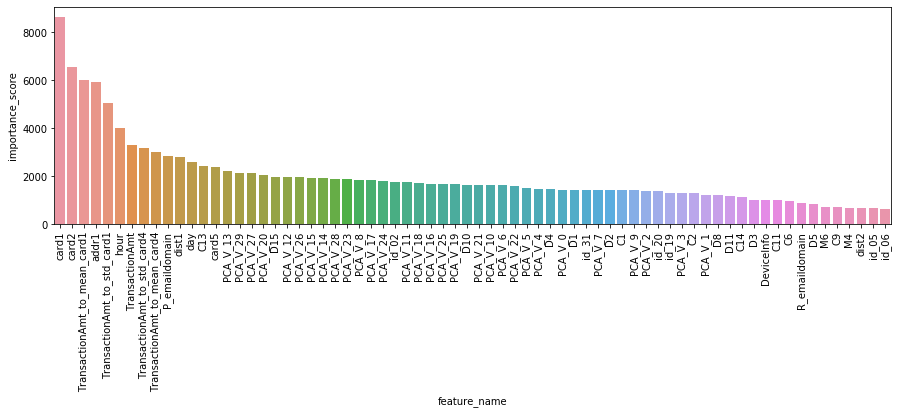

In [645]:
# feature importantce
plt.figure(figsize=(15,4))
best_random_lgbm_sorted_importance = sorted(zip(X_train.columns, best_random_lgbm.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*best_random_lgbm_sorted_importance)
fp = pd.DataFrame({'feature_name':a, 'importance_score':b})[:70]
sns.barplot(x="feature_name", y="importance_score", data=fp)
plt.xticks(rotation=90)
plt.show()

In [646]:
best_random_lgbm_sorted_importance

[('card1', 8632),
 ('card2', 6543),
 ('TransactionAmt_to_mean_card1', 6008),
 ('addr1', 5941),
 ('TransactionAmt_to_std_card1', 5041),
 ('hour', 4008),
 ('TransactionAmt', 3293),
 ('TransactionAmt_to_std_card4', 3188),
 ('TransactionAmt_to_mean_card4', 3030),
 ('P_emaildomain', 2846),
 ('dist1', 2804),
 ('day', 2588),
 ('C13', 2450),
 ('card5', 2367),
 ('PCA_V_13', 2241),
 ('PCA_V_29', 2141),
 ('PCA_V_27', 2136),
 ('PCA_V_20', 2061),
 ('D15', 1976),
 ('PCA_V_12', 1967),
 ('PCA_V_26', 1956),
 ('PCA_V_15', 1935),
 ('PCA_V_14', 1927),
 ('PCA_V_28', 1893),
 ('PCA_V_23', 1890),
 ('PCA_V_8', 1861),
 ('PCA_V_17', 1841),
 ('PCA_V_24', 1784),
 ('id_02', 1775),
 ('PCA_V_11', 1765),
 ('PCA_V_18', 1740),
 ('PCA_V_16', 1700),
 ('PCA_V_25', 1668),
 ('PCA_V_19', 1661),
 ('D10', 1654),
 ('PCA_V_21', 1634),
 ('PCA_V_10', 1628),
 ('PCA_V_6', 1620),
 ('PCA_V_22', 1593),
 ('PCA_V_5', 1515),
 ('PCA_V_4', 1487),
 ('D4', 1454),
 ('PCA_V_0', 1445),
 ('D1', 1438),
 ('id_31', 1429),
 ('PCA_V_7', 1426),
 ('D2', 

In [648]:
low_importance = []
for i in best_random_lgbm_sorted_importance:
    if i[1] <= 2:
        low_importance.append(i[0])
low_importance

['id_22',
 'id_29',
 'id_35',
 'id_27',
 'browser_id_31',
 'version_id_31',
 'resol_width_id_31',
 'resol_height_id_31',
 'Trans_min_mean',
 'Trans_min_std']

Doing feature selection by removing low importantce features

In [ ]:
# train.drop(columns=low_importance, axis=1, inplace=False)

In [84]:
# The Second Submission
y_preds_ = rf_random.best_estimator_.predict_proba(test)[:,1]
sample_submission['isFraud'] = y_preds_
sample_submission.to_csv('lgbm_random_grid.csv',index=False)

## LightGBM using F-beta
Tune lightgbm based on f-beta tuned according to seperated datasets with different level of TransactionAmt

Seperate datasets three parts based on different transactionAmt

In [489]:
train_for_sep = pd.concat([X_train, y_train],axis=1)
test_for_sep = pd.concat([X_test, y_test],axis=1)

In [487]:
del train_for_sep, test_for_sep

In [490]:
train_high_cost = train_for_sep[train_for_sep.TransactionAmt > 529]
train_medium_cost = train_for_sep[(train_for_sep.TransactionAmt > 12) & (train_for_sep.TransactionAmt < 529)]
train_low_cost = train_for_sep[train_for_sep.TransactionAmt < 12]

test_high_cost = test_for_sep[test_for_sep.TransactionAmt > 529]
test_medium_cost = test_for_sep[(test_for_sep.TransactionAmt > 12) & (test_for_sep.TransactionAmt < 529) ]
test_low_cost = test_for_sep[test_for_sep.TransactionAmt < 12]

In [491]:
print(train_high_cost.shape,train_medium_cost.shape,train_low_cost.shape)
print(test_high_cost.shape,test_medium_cost.shape,test_low_cost.shape)

(14602, 140) (390613, 140) (7366, 140)
(6167, 140) (167463, 140) (3204, 140)


In [590]:
y_train_high_cost = train_high_cost.isFraud
X_train_high_cost = train_high_cost.drop(columns=['isFraud'])
y_test_high_cost = test_high_cost.isFraud
X_test_high_cost = test_high_cost.drop(columns=['isFraud'])

y_train_medium_cost = train_medium_cost.isFraud
X_train_medium_cost = train_medium_cost.drop(columns=['isFraud'])
y_test_medium_cost = test_medium_cost.isFraud
X_test_medium_cost = test_medium_cost.drop(columns=['isFraud'])

y_train_low_cost = train_low_cost.isFraud
X_train_low_cost = train_low_cost.drop(columns=['isFraud'])
y_test_low_cost = test_low_cost.isFraud
X_test_low_cost = test_low_cost.drop(columns=['isFraud'])

In [495]:
print(X_train_high_cost.shape,y_train_high_cost.shape)
print(X_test_high_cost.shape,y_test_high_cost.shape)
print(X_train_medium_cost.shape,y_train_medium_cost.shape)
print(X_test_medium_cost.shape,y_test_medium_cost.shape)

(14602, 139) (14602,)
(6167, 139) (6167,)
(390613, 139) (390613,)
(167463, 139) (167463,)


Params Grid

In [591]:
# Number of trees in LightGBM
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(-1)
# Minimum loss reduction required to make a further partition on a leaf node of the tree. A lower value will result in deeper trees.
min_split_gain = [ round(x,3) for x in np.linspace(start = 0.001, stop = 0.1, num = 10)]
min_split_gain.append(0)
# Maximum tree leaves for base learners. A higher value results in deeper trees.
num_leaves = [int(x) for x in np.linspace(start = 1, stop = 300, num = 10)]
# Minimum number of data points needed in a child (leaf) node. According to the LightGBM docs, this is a very important parameter to prevent overfitting.
min_child_samples = [int(x) for x in np.linspace(start = 1, stop = 30, num = 10)]
# The fraction of rows to consider at each subsampling stage. 
subsample = [round(x,4) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
# The fraction of columns to consider at each subsampling stage. 
colsample_bytree = [round(x,4) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
# bagging should be performed after every k iterations.
subsample_freq = [int(x) for x in np.linspace(start = 0, stop = 15, num = 10)]
# The level of reduction on the influence of each individual tree and leaves space for future trees to improve the model.
learning_rate = [round(x,4) for x in np.linspace(start = 0.01, stop = 0.2, num = 11)]
# L1 regularization term on weights.
reg_alpha = [round(x,4) for x in np.linspace(0.01, 0.5, num=30)]
# L2 regularization term on weights.
reg_lambda = [round(x,4) for x in np.linspace(0.01, 0.5, num=30)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,               
               'min_split_gain': min_split_gain,
               'num_leaves': num_leaves,
               'min_child_samples': min_child_samples,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'subsample_freq': subsample_freq,
               'learning_rate': learning_rate,
               'reg_alpha': reg_alpha,
               'reg_lambda': reg_lambda
              }
               
pprint(random_grid)

{'colsample_bytree': [0.6,
                      0.6444,
                      0.6889,
                      0.7333,
                      0.7778,
                      0.8222,
                      0.8667,
                      0.9111,
                      0.9556,
                      1.0],
 'learning_rate': [0.01,
                   0.029,
                   0.048,
                   0.067,
                   0.086,
                   0.105,
                   0.124,
                   0.143,
                   0.162,
                   0.181,
                   0.2],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1],
 'min_child_samples': [1, 4, 7, 10, 13, 17, 20, 23, 26, 30],
 'min_split_gain': [0.001,
                    0.012,
                    0.023,
                    0.034,
                    0.045,
                    0.056,
                    0.067,
                    0.078,
                    0.089,
                    0.1,
                    0],
 'n_estimators': 

In [482]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)
# fone_scorer = make_scorer(fbeta_score, beta=1) # use built-in 'f1' f1_score
fhalf_scorer = make_scorer(fbeta_score, beta=0.5)

Tune lightgbm on High-cost transactions using F2 score

In [592]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune:
    # base_lgbm = LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
# Random search of parameters with auc_roc scoring, using 3 fold stratified cross validation
skf = StratifiedKFold(n_splits=3, random_state=42)
# search across 60 different combinations, and use all available cores
lgbm_random_ftwo = RandomizedSearchCV(estimator = base_lgbm, param_distributions = random_grid, n_iter = 60, 
                                      scoring = ftwo_scorer, cv = skf, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
lgbm_random_ftwo.fit(X_train_high_cost, y_train_high_cost)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight='balanced',
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, obje...
                                                       0.2634, 0.2803, 0.2972,
                                                       0.3141, 0.331, 0.3479,
                                       

In [593]:
lgbm_random_ftwo.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.8667, importance_type='split',
               learning_rate=0.181, max_depth=3, min_child_samples=30,
               min_child_weight=0.001, min_split_gain=0.045, n_estimators=500,
               n_jobs=-1, num_leaves=266, objective=None, random_state=42,
               reg_alpha=0.2972, reg_lambda=0.1283, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=5)

In [598]:
lgbm_random_ftwo_train_pdt = lgbm_random_ftwo.predict_proba(X_train_high_cost)
lgbm_random_ftwo_test_pdt = lgbm_random_ftwo.predict_proba(X_test_high_cost)

In [599]:
ftwo_score_train = {}
ftwo_score_test = {}
for i in [round(x,2) for x in np.linspace(0.1,1,50)]:
    lgbm_random_ftwo_train_y_pred = lgbm_random_ftwo_train_pdt[:,1] > i
    ftwo_score_train[i] = fbeta_score(y_train_high_cost, lgbm_random_ftwo_train_y_pred, beta=2)
    
    lgbm_random_ftwo_test_y_pred = lgbm_random_ftwo_test_pdt[:,1] > i
    ftwo_score_test[i] = fbeta_score(y_test_high_cost, lgbm_random_ftwo_test_y_pred, beta=2)

In [617]:
print('The threshold that returns the highest F2 score in train is: %0.2f, the corresponding score is: %0.4f' %(max(zip(ftwo_score_train.values(), ftwo_score_train.keys()))[1],max(zip(ftwo_score_train.values(), ftwo_score_train.keys()))[0]))
print('The threshold that returns the highest F2 score in test is: %0.2f, the corresponding score is: %0.4f' %(max(zip(ftwo_score_test.values(), ftwo_score_test.keys()))[1],max(zip(ftwo_score_test.values(), ftwo_score_test.keys()))[0]))

The threshold that returns the highest F2 score in train is: 0.69, the corresponding score is: 0.9693
The threshold that returns the highest F2 score in test is: 0.49, the corresponding score is: 0.6221


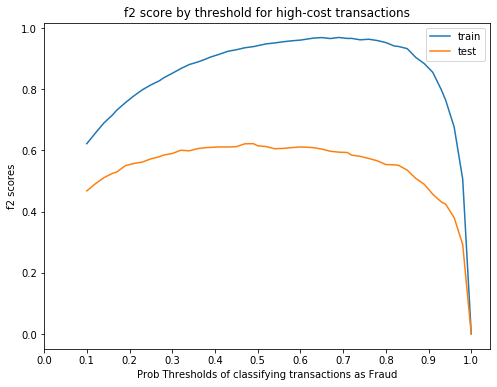

In [618]:
plt.figure(figsize=(8,6))
sns.lineplot(*zip(*sorted(ftwo_score_train.items())))
sns.lineplot(*zip(*sorted(ftwo_score_test.items())))
plt.title('f2 score by threshold for high-cost transactions')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend(['train','test'])
plt.ylabel('f2 scores')
plt.xlabel('Prob Thresholds of classifying transactions as Fraud')
plt.show()

Tune lightgbm on medium-cost transactions using F1 score

In [587]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune:
    # base_lgbm = LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
# Random search of parameters with auc_roc scoring, using 3 fold stratified cross validation
skf = StratifiedKFold(n_splits=3, random_state=42)
# search across 60 different combinations, and use all available cores
lgbm_random_fone = RandomizedSearchCV(estimator = base_lgbm, param_distributions = random_grid, n_iter = 60, scoring = 'f1', cv = skf, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
lgbm_random_fone.fit(X_train_medium_cost, y_train_medium_cost)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight='balanced',
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, obje...
                                                       0.1621, 0.179, 0.1959,
                                                       0.2128, 0.2297, 0.2466,
                                       

In [603]:
lgbm_random_fone.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.9556, importance_type='split',
               learning_rate=0.048, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.045, n_estimators=1000,
               n_jobs=-1, num_leaves=266, objective=None, random_state=42,
               reg_alpha=0.0776, reg_lambda=0.1114, silent=True,
               subsample=0.7333, subsample_for_bin=200000, subsample_freq=5)

In [604]:
lgbm_random_fone_train_pdt = lgbm_random_fone.predict_proba(X_train_medium_cost)
lgbm_random_fone_test_pdt = lgbm_random_fone.predict_proba(X_test_medium_cost)

In [605]:
fone_score_train = {}
fone_score_test = {}
for i in [round(x,2) for x in np.linspace(0.1,1,50)]:
    lgbm_random_fone_train_y_pred = lgbm_random_fone_train_pdt[:,1] > i
    fone_score_train[i] = fbeta_score(y_train_medium_cost, lgbm_random_fone_train_y_pred, beta=1)
    
    lgbm_random_fone_test_y_pred = lgbm_random_fone_test_pdt[:,1] > i
    fone_score_test[i] = fbeta_score(y_test_medium_cost, lgbm_random_fone_test_y_pred, beta=1)

In [606]:
print('The threshold that returns the highest F1 score in train is: %0.2f, the corresponding score is: %0.4f' %(max(zip(fone_score_train.values(), fone_score_train.keys()))[1],max(zip(fone_score_train.values(), fone_score_train.keys()))[0]))
print('The threshold that returns the highest F1 score in test is: %0.2f, the corresponding score is: %0.4f' %(max(zip(fone_score_test.values(), fone_score_test.keys()))[1],max(zip(fone_score_test.values(), fone_score_test.keys()))[0]))

The threshold that returns the highest F1 score in train is: 0.61, the corresponding score is: 0.9999
The threshold that returns the highest F1 score in test is: 0.38, the corresponding score is: 0.7872


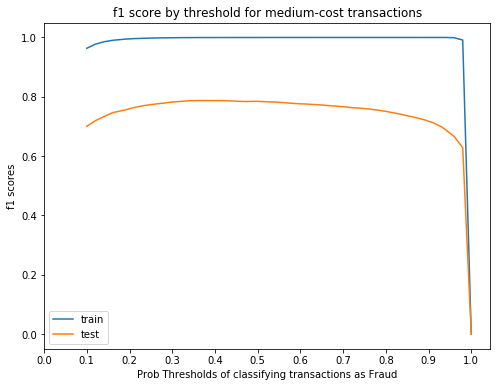

In [607]:
plt.figure(figsize=(8,6))
sns.lineplot(*zip(*sorted(fone_score_train.items())))
sns.lineplot(*zip(*sorted(fone_score_test.items())))
plt.title('f1 score by threshold for medium-cost transactions')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend(['train','test'])
plt.ylabel('f1 scores')
plt.xlabel('Prob Thresholds of classifying transactions as Fraud')
plt.show()

Tune lightgbm on low-cost transactions using F0.5 score

In [608]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune:
    # base_lgbm = LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
# Random search of parameters with auc_roc scoring, using 3 fold stratified cross validation
skf = StratifiedKFold(n_splits=3, random_state=42)
# search across 60 different combinations, and use all available cores
lgbm_random_fhalf = RandomizedSearchCV(estimator = base_lgbm, param_distributions = random_grid, n_iter = 60, scoring = fhalf_scorer, cv = skf, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
lgbm_random_fhalf.fit(X_train_low_cost, y_train_low_cost)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight='balanced',
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, obje...
                                                       0.2634, 0.2803, 0.2972,
                                                       0.3141, 0.331, 0.3479,
                                       

In [610]:
lgbm_random_fhalf.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.6444, importance_type='split',
               learning_rate=0.086, max_depth=10, min_child_samples=26,
               min_child_weight=0.001, min_split_gain=0.023, n_estimators=200,
               n_jobs=-1, num_leaves=100, objective=None, random_state=42,
               reg_alpha=0.0438, reg_lambda=0.1452, silent=True,
               subsample=0.8667, subsample_for_bin=200000, subsample_freq=0)

In [611]:
lgbm_random_fhalf_train_pdt = lgbm_random_fhalf.predict_proba(X_train_low_cost)
lgbm_random_fhalf_test_pdt = lgbm_random_fhalf.predict_proba(X_test_low_cost)

In [612]:
fhalf_score_train = {}
fhalf_score_test = {}
for i in [round(x,2) for x in np.linspace(0.1,1,50)]:
    lgbm_random_fhalf_train_y_pred = lgbm_random_fhalf_train_pdt[:,1] > i
    fhalf_score_train[i] = fbeta_score(y_train_low_cost, lgbm_random_fhalf_train_y_pred, beta=0.5)
    
    lgbm_random_fhalf_test_y_pred = lgbm_random_fhalf_test_pdt[:,1] > i
    fhalf_score_test[i] = fbeta_score(y_test_low_cost, lgbm_random_fhalf_test_y_pred, beta=0.5)

In [614]:
print('The threshold that returns the highest F0.5 score in train is: %0.2f, the corresponding score is: %0.4f' %(max(zip(fhalf_score_train.values(), fhalf_score_train.keys()))[1],max(zip(fhalf_score_train.values(), fhalf_score_train.keys()))[0]))
print('The threshold that returns the highest F0.5 score in test is: %0.2f, the corresponding score is: %0.4f' %(max(zip(fhalf_score_test.values(), fhalf_score_test.keys()))[1],max(zip(fhalf_score_test.values(), fhalf_score_test.keys()))[0]))

The threshold that returns the highest F0.5 score in train is: 0.96, the corresponding score is: 1.0000
The threshold that returns the highest F0.5 score in test is: 0.76, the corresponding score is: 0.8998


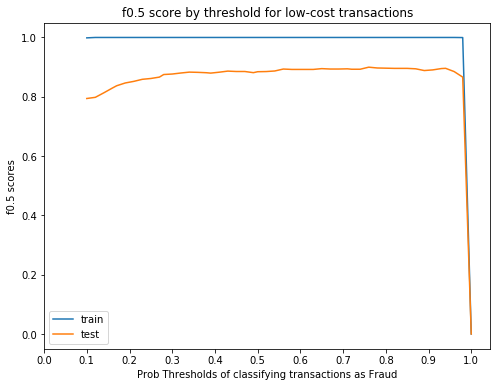

In [615]:
plt.figure(figsize=(8,6))
sns.lineplot(*zip(*sorted(fhalf_score_train.items())))
sns.lineplot(*zip(*sorted(fhalf_score_test.items())))
plt.title('f0.5 score by threshold for low-cost transactions')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend(['train','test'])
plt.ylabel('f0.5 scores')
plt.xlabel('Prob Thresholds of classifying transactions as Fraud')
plt.show()

In [649]:
gc.collect()

46137

## Other Drafts

In [244]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [258]:
base_lgbm_train_predict

array([[0.79342238, 0.20657762],
       [0.92349182, 0.07650818],
       [0.2723403 , 0.7276597 ],
       ...,
       [0.8441815 , 0.1558185 ],
       [0.95114916, 0.04885084],
       [0.79980575, 0.20019425]])

In [259]:
base_lgbm.classes_

array([False,  True])

In [262]:
pd.DataFrame(base_lgbm_train_predict, columns=['Legit', 'Fraud']).head()

Legit     Fraud
0  0.793422  0.206578
1  0.923492  0.076508
2  0.272340  0.727660
3  0.857315  0.142685
4  0.936244  0.063756

In [255]:
y_pred_class = base_lgbm_train_predict[:, 1] > 0.8
cm = confusion_matrix(y_train, y_pred_class)
tn, fp, fn, tp = cm.ravel()

In [254]:
tn, fp, fn, tp

(355066, 43218, 2127, 12257)

In [ ]:
y_pred_class = base_lgbm_train_predict[:, 1] > 0.9
cm = confusion_matrix(y_train, y_pred_class)
tn, fp, fn, tp = cm.ravel()

In [263]:
tn, fp, fn, tp

(391578, 6706, 5828, 8556)